# Case Data Analytics Ifood

__Autor__ : Ivis Marcelo Ribeiro \
__E-mail__ : ivis_ribeiro@hotmail.com 

## The Company


Consider a well-established company operating in the retail food sector. Presently they have around
several hundred thousand registered customers and serve almost one million consumers a year.
They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially
prepared fish and sweet products. These can further be divided into gold and regular products. The
customers can order and acquire products through 3 sales channels: physical stores, catalogs and
company’s website. Globally, the company had solid revenues and a healthy bottom line in the past
3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason,
several strategic initiatives are being considered to invert this situation. One is to improve the
performance of marketing activities, with a special focus on marketing campaigns.

## The marketing department

The marketing department was pressured to spend its annual budget more wisely. The CMO
perceives the importance of having a more quantitative approach when taking decisions, reason why
a small team of data scientists was hired with a clear objective in mind: to build a predictive model
which will support direct marketing initiatives. Desirably, the success of these activities will prove the
value of the approach and convince the more skeptical within the company

## The objective

the objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at
selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240
customers was carried out. The customers were selected at random and contacted by phone
regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue
generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a
profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is to
develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully, the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.


|Total cost|Revenue generated |Global profit | Success rate|
|:-:|:-:|:-:|:-:|
|6.720 MU | 3.674 MU | -3.046 MU | 15%|

 ###  Nossa análise será dividida em 3 grandes passos 
     
  * [Análise Exploratória](#analise_exploratoria)
  * [Segmentaçã de Clientes](#segmentacao_cliente)
  * [Modelo Preditivo](#model_pred)

        
 

# Funções de Análise Exploratória


In [1]:
def getMedidasPosicao(df):
    medidas_posicao = df.describe()
    serie_mediana = pd.Series(df.median(), name='mediana')
    serie_moda    = pd.Series(df.mode(numeric_only=True).iloc[0,:], name='moda')
    medidas_posicao = medidas_posicao.append(serie_mediana, ignore_index = False)
    medidas_posicao = medidas_posicao.append(serie_moda, ignore_index = False)
    return medidas_posicao

def getMedidasDispersao(df):
    med_pos = getMedidasPosicao(df)
    serie_variancia = pd.Series(df.var(), name='variancia')
    serie_desvioAbsoluto = pd.Series(df.mad(), name='desvioAbsoluto')
    medidas_dispersao = med_pos.append(serie_variancia, ignore_index = False)
    medidas_dispersao = medidas_dispersao.append(serie_desvioAbsoluto, ignore_index = False)
    return medidas_dispersao

def proporcaoSerie(s):
    return (s.value_counts()/(len(s)-s.isna().sum()))

def retira_nulos(valor, coluna, limiar):
    numero = np.random.randint(1,100)    
    if pd.isnull(valor):
            if numero<=limiar:
                return 'nao'
            else:
                return 'sim'
    else:
        return valor

def define_mesNumero(valor):
    if (valor=='jan'):
        return 1
    elif (valor=='fev'):
        return 2
    elif (valor=='mar'):
        return 3
    elif (valor=='abr'):
        return 4
    elif (valor=='mai'):
        return 5
    elif (valor=='jun'):
        return 6
    elif (valor=='jul'):
        return 7
    elif (valor=='ago'):
        return 8
    elif (valor=='set'):
        return 9
    elif (valor=='out'):
        return 10
    elif (valor=='nov'):
        return 11
    elif (valor=='dez'):
        return 12


def splitFeaturesTarget(df):  
    X = df.iloc[:, :-1]
    y = df.iloc[:,-1]
    return X, y

def splitTrainTest(df, percentTest):
    X, y = splitFeaturesTarget(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentTest, random_state=1)
    return X_train, X_test, y_train, y_test

def concatXY(x, y, nome):
    seriey = pd.Series(y, name=nome)
    dftrain = pd.concat([x, seriey], axis=1)
    return dftrain

def excluiColuna(df2, column_name):
    df = df2.copy()
    df = df.drop(column_name, axis=1)
    return df


def geraHistograma(serie, column_name):
    plt.hist(serie , color='red', bins=15)
    plt.title('Histograma da variável '+column_name)
    plt.show() 
    
def transfUnbalacedDFtoBalancedDF(df):
    #NEARMISS UTILIZA 3 TIPOS DE HEURISTICAS QUE PODE SER SELECIONADO ALTERANDO O PARAMETRO VERSION, AS HEURISTICAS SAO BASEADAS NOS VIZINHOS PROXIMOS
    nm1 = NearMiss(version=1)
    X, y = splitFeaturesTarget(dfreg)
    X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)
    y_resampled = pd.Series(y_resampled)
    X_resampled_nm1 = pd.DataFrame(list(map(np.ravel, X_resampled_nm1)), columns = X.columns)
    df_balanced = concatXY(X_resampled_nm1, y_resampled, 'resultado')
    return df_balanced

def geraHistogramaTodasColunas(df):   
    columns = df.columns
    contador = 1
    for column in columns:   
        geraHistograma(df[columns[contador-1]], columns[contador-1])
        contador+=1
    plt.show()
    
def tiraOutliersBaseadoPercentil(df2):
    df = df2.copy()
    Q1 = df_balanced.quantile(0.25)
    Q3 = df_balanced.quantile(0.75)
    IQR = Q3 - Q1
    df_balanced_semout = df_balanced[~((df_balanced < (Q1 - 1.5 * IQR)) |(df_balanced > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_balanced_semout

### Importando lib's

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

# 1. Análise Exploratória <a class="anchor" id="analise_exploratoria"></a> [Índice](#indice)

In [4]:
#importando DataFrame
df = pd.read_csv('data_mkt.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [8]:
#transf Dt_customer  date
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"])

In [9]:
#missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

As colunas Z_ConstContact e Z_Revenue 

has the same value for all observations, let's eliminate them from the dataframe



In [11]:
df.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [12]:
df['Total Campaigns'] =(df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5)

In [14]:
df["Years_Customer"] = ((dt.today()-df.Dt_Customer).dt.days)/365
df["Years_Customer"]

0       9.416438
1       7.909589
2       8.454795
3       7.980822
4       8.041096
          ...   
2235    8.643836
2236    7.652055
2237    8.024658
2238    8.027397
2239    9.304110
Name: Years_Customer, Length: 2240, dtype: float64

In [15]:

today = dt.now()
df['Age']=(today.year - df.Year_Birth)

In [16]:
df.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: ID, dtype: int64

In [17]:
df["Marital_Status"].replace(['Alone'],'Single',inplace=True)
df["Marital_Status"].replace(['Together'],'Married',inplace=True)

df.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
YOLO           2
Absurd         2
Name: ID, dtype: int64

In [18]:
proporcaoSerie(df["Marital_Status"])

Married     0.644643
Single      0.215625
Divorced    0.103571
Widow       0.034375
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

In [19]:
#Drop rows with akward/imprecise marital status
df.drop(df[df['Marital_Status'] == 'Absurd'].index, inplace=True)
df.drop(df[df['Marital_Status'] == 'YOLO'].index, inplace=True)

In [20]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [21]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [141]:
#Create column Num Children (number of children at home: small kids+teens)
num_children = df[['Kidhome','Teenhome']]
df['Num Children'] = num_children.sum(axis=1)

KeyError: "None of [Index(['Kidhome', 'Teenhome'], dtype='object')] are in the [columns]"

In [23]:
#Categorize customers by age range

def age_range(yo): 
    if yo < 30: 
        return '18-29' 
    elif yo < 40: 
        return '30-39' 
    elif yo < 50: 
        return '40-49' 
    elif yo < 60: 
        return '50-59' 
    elif yo < 70: 
        return '60-69' 
    elif yo < 80: 
        return '70 - 79' 
    elif yo >= 80: 
        return '80+'

In [24]:
df['Age Group'] = df['Age'].apply(age_range)

In [25]:
df = df.drop('Year_Birth', axis= 1)

In [26]:
df.head(10)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Campaigns,Years_Customer,Age,Num Children,Age Group
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,0,9.416438,65,0,60-69
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,7.909589,68,2,60-69
2,4141,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,8.454795,57,0,50-59
3,6182,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,7.980822,38,1,30-39
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,8.041096,41,1,40-49
5,7446,Master,Married,62513.0,0,1,2013-09-09,16,520,42,...,0,0,0,0,0,0,8.402740,55,1,50-59
6,965,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,...,0,0,0,0,0,0,9.224658,51,1,50-59
7,6177,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,...,0,0,0,0,0,0,8.742466,37,1,30-39
8,4855,PhD,Married,30351.0,1,0,2013-06-06,19,14,0,...,0,0,0,0,1,0,8.663014,48,1,40-49
9,5899,PhD,Married,5648.0,1,1,2014-03-13,68,28,0,...,0,0,0,0,0,1,7.895890,72,2,70 - 79


In [27]:
#Number of months since the customer enrolled

def totalMonths(enrollDt):
    current_date = datetime.datetime(2022,1,8)
    month = enrollDt.month
    day = enrollDt.day
    year = enrollDt.year
    enroll_date = datetime.datetime(year,month,day)
    
    num_months =(current_date.year - enroll_date.year) * 12 + (current_date.month - enroll_date.month)
    
    return num_months

In [28]:
df['Months_Customer'] = df['Dt_Customer'].apply(totalMonths)


In [29]:
df.head(10)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Campaigns,Years_Customer,Age,Num Children,Age Group,Months_Customer
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,1,0,9.416438,65,0,60-69,112
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,7.909589,68,2,60-69,94
2,4141,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,8.454795,57,0,50-59,101
3,6182,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,7.980822,38,1,30-39,95
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,8.041096,41,1,40-49,96
5,7446,Master,Married,62513.0,0,1,2013-09-09,16,520,42,...,0,0,0,0,0,8.402740,55,1,50-59,100
6,965,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,...,0,0,0,0,0,9.224658,51,1,50-59,110
7,6177,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,...,0,0,0,0,0,8.742466,37,1,30-39,104
8,4855,PhD,Married,30351.0,1,0,2013-06-06,19,14,0,...,0,0,0,1,0,8.663014,48,1,40-49,103
9,5899,PhD,Married,5648.0,1,1,2014-03-13,68,28,0,...,0,0,0,0,1,7.895890,72,2,70 - 79,94


In [30]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total Campaigns', 'Years_Customer', 'Age',
       'Num Children', 'Age Group', 'Months_Customer'],
      dtype='object')

In [31]:
df_mnt = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']]
df['Total Spent'] = df_mnt.sum(axis=1)

In [32]:
#Create a column containing the number of total offers accepted from Campaigns 1 to 5
df_cmp = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]
df['Total Campaigns'] = df_cmp.sum(axis=1)

In [33]:
#Create column Total Purchases containing the Total number of purchases made
df_purchases = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
df['Total Purchases'] = df_purchases.sum(axis=1)

In [34]:
#Marital Status
df.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Name: ID, dtype: int64

In [35]:
#Age Group
df.groupby("Age Group")["ID"].nunique().sort_values(ascending = False)

Age Group
50-59      620
40-49      618
60-69      464
30-39      286
70 - 79    229
18-29       14
80+          5
Name: ID, dtype: int64

In [36]:
df.groupby("Num Children")["ID"].nunique().sort_values(ascending = False)

Num Children
1    1126
0     636
2     421
3      53
Name: ID, dtype: int64

In [37]:
#Medidas de Posição
med_pos = getMedidasPosicao(df).T
med_pos

,count,mean,std,min,25%,50%,75%,max,mediana,moda
ID,2236.0,5591.551878,3245.240106,0.0,2828.250000,5458.500000,8427.750000,11191.000000,5458.500000,0.000000
Income,2212.0,52232.510850,25187.455359,1730.0,35233.500000,51381.500000,68522.000000,666666.000000,51381.500000,7500.000000
Kidhome,2236.0,0.444991,0.538551,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
Teenhome,2236.0,0.506261,0.544615,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
Recency,2236.0,49.147138,28.954880,0.0,24.000000,49.000000,74.000000,99.000000,49.000000,56.000000
MntWines,2236.0,303.873435,336.876776,0.0,23.000000,173.000000,505.000000,1493.000000,173.000000,2.000000
MntFruits,2236.0,26.271020,39.761356,0.0,1.000000,8.000000,33.000000,199.000000,8.000000,0.000000
MntMeatProducts,2236.0,166.924419,225.778550,0.0,16.000000,67.000000,232.000000,1725.000000,67.000000,7.000000
MntFishProducts,2236.0,37.405188,54.436749,0.0,3.000000,12.000000,50.000000,259.000000,12.000000,0.000000
MntSweetProducts,2236.0,27.081395,41.300943,0.0,1.000000,8.000000,33.000000,263.000000,8.000000,0.000000


In [38]:
med_disp = getMedidasDispersao(df).T
med_disp

,count,mean,std,min,25%,50%,75%,max,mediana,moda,variancia,desvioAbsoluto
ID,2236.0,5591.551878,3245.240106,0.0,2828.250000,5458.500000,8427.750000,11191.000000,5458.500000,0.000000,1.053158e+07,2797.770931
Income,2212.0,52232.510850,25187.455359,1730.0,35233.500000,51381.500000,68522.000000,666666.000000,51381.500000,7500.000000,6.344079e+08,18144.534593
Kidhome,2236.0,0.444991,0.538551,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.900375e-01,0.513053
Teenhome,2236.0,0.506261,0.544615,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.966051e-01,0.523469
Recency,2236.0,49.147138,28.954880,0.0,24.000000,49.000000,74.000000,99.000000,49.000000,56.000000,8.383851e+02,25.035463
MntWines,2236.0,303.873435,336.876776,0.0,23.000000,173.000000,505.000000,1493.000000,173.000000,2.000000,1.134860e+05,275.910530
MntFruits,2236.0,26.271020,39.761356,0.0,1.000000,8.000000,33.000000,199.000000,8.000000,0.000000,1.580965e+03,28.520410
MntMeatProducts,2236.0,166.924419,225.778550,0.0,16.000000,67.000000,232.000000,1725.000000,67.000000,7.000000,5.097595e+04,167.533906
MntFishProducts,2236.0,37.405188,54.436749,0.0,3.000000,12.000000,50.000000,259.000000,12.000000,0.000000,2.963360e+03,40.286548
MntSweetProducts,2236.0,27.081395,41.300943,0.0,1.000000,8.000000,33.000000,263.000000,8.000000,0.000000,1.705768e+03,29.590111


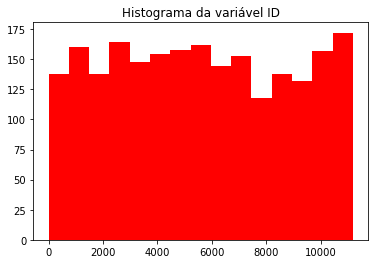

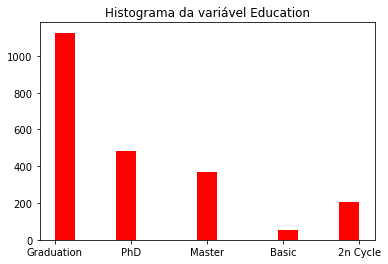

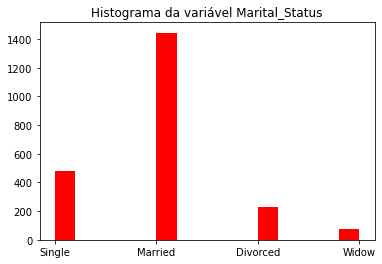

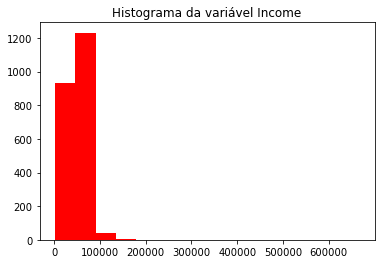

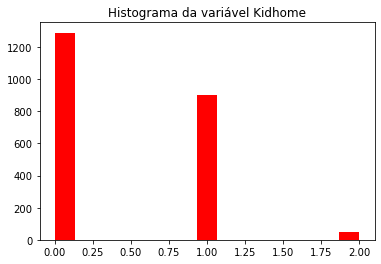

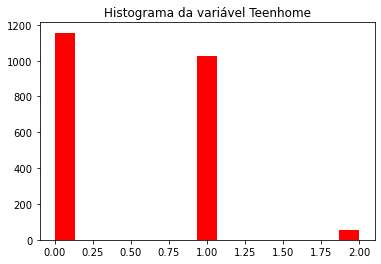

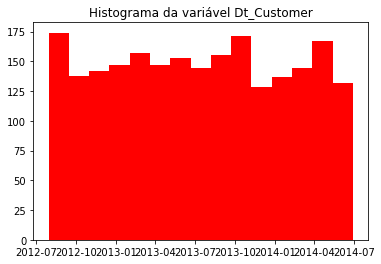

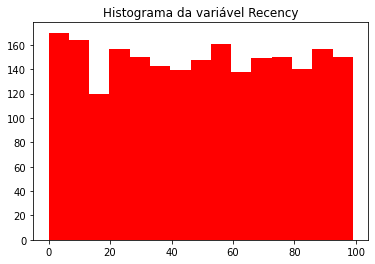

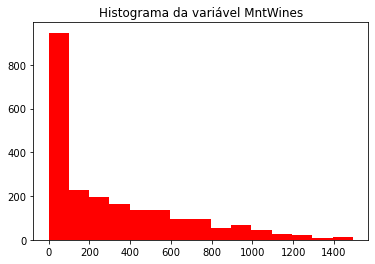

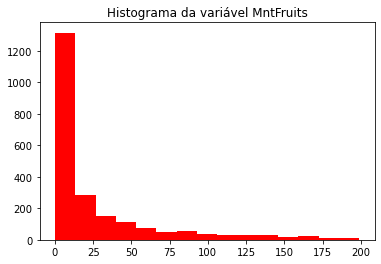

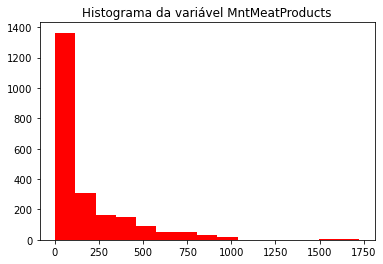

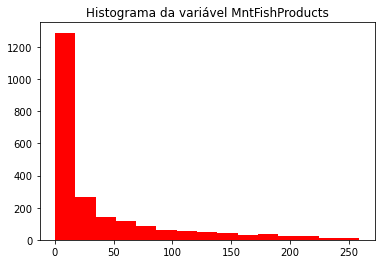

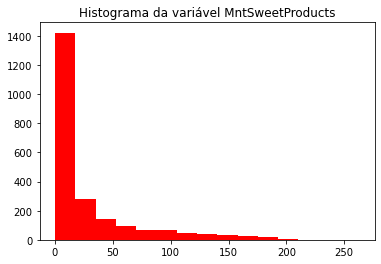

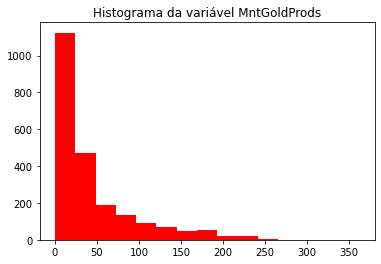

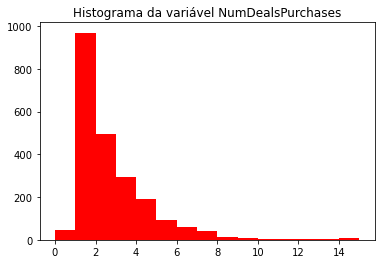

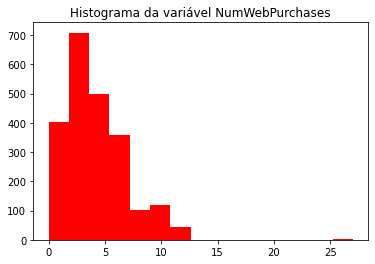

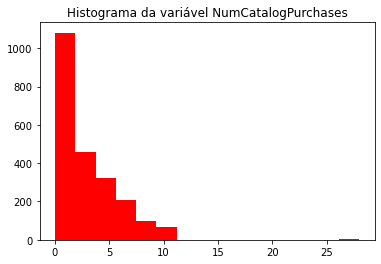

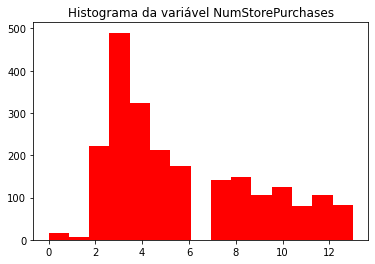

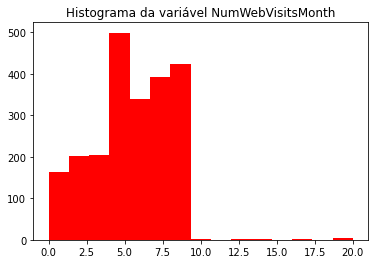

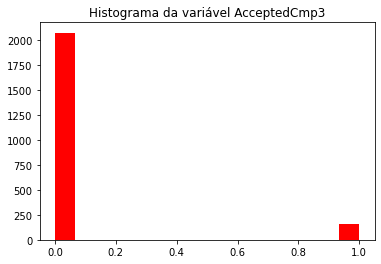

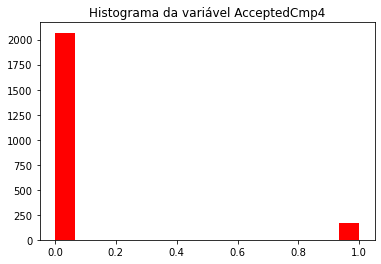

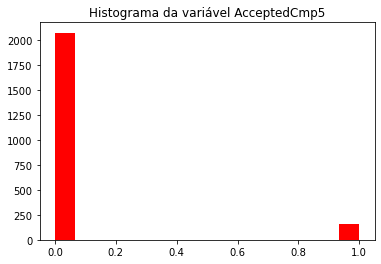

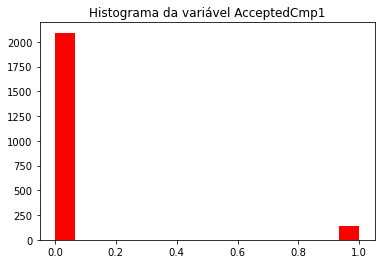

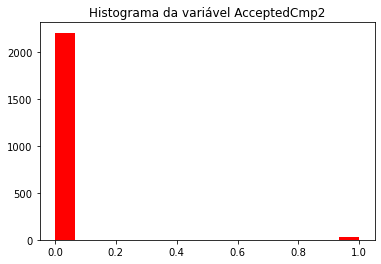

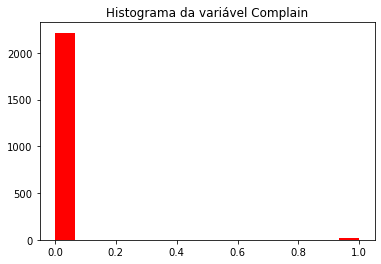

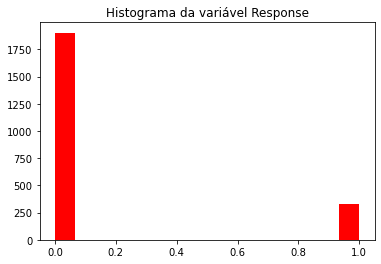

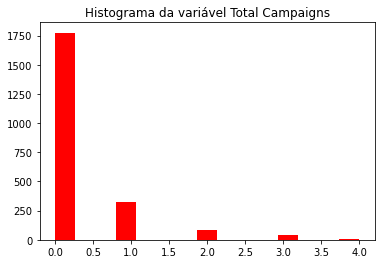

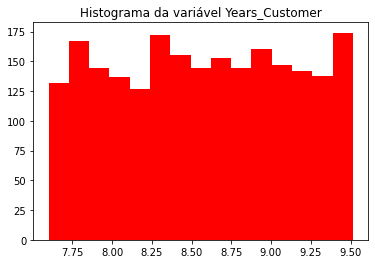

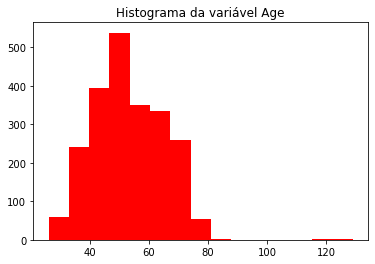

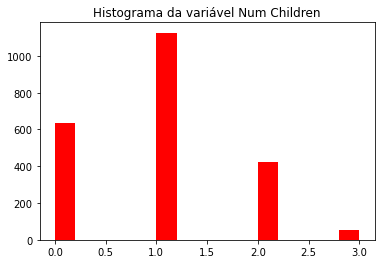

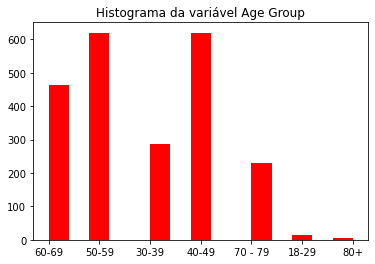

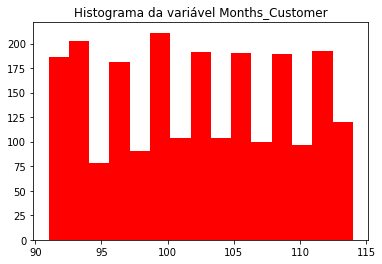

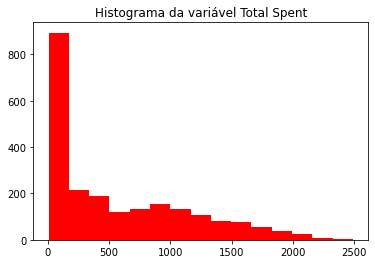

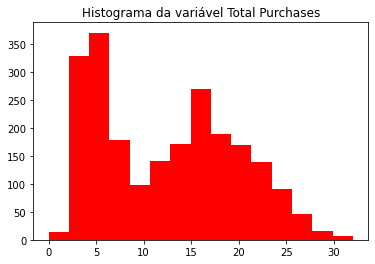

In [39]:
geraHistogramaTodasColunas(df)

### Observing the measures of dispersion, position and the histograms, we can make some inferences regarding the data



        * Most customers have a higher level of education
        * Most customers are married or live with someone
        * The dataset has some outliers
        * Most clients do not have children or teenagers at home.

### After the observations we will perform some treatments for outliers and missing data

In [40]:
df_silver = df.copy()

In [41]:
df_silver['Income'].isna().sum()

24

In [42]:
prop_null = df_silver.Income.isnull().sum()/2240
print("proporção valores nulos variavel INCOME :",prop_null*100)

proporção valores nulos variavel INCOME : 1.0714285714285714


In [142]:
#As the proportion of missing data is a little more than 1% we can exclude observations,
#because the impact for analysis is minimal

df_silver = df_silver[~df_silver['Income'].isna()]
df_silver.shape

(2212, 47)

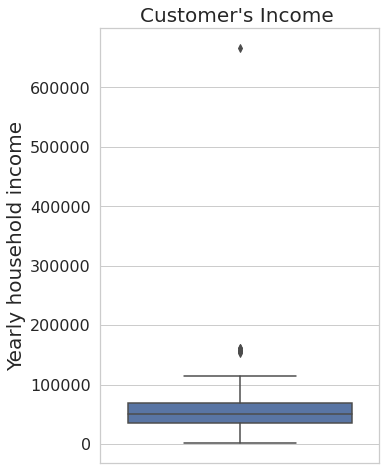

In [143]:
sns.set(style = 'whitegrid',rc={'figure.figsize':(5,8)})
ax = sns.boxplot(y=df_silver.Income)
ax.axes.set_title("Customer's Income ",fontsize=20)
ax.set_ylabel("Yearly household income",fontsize=20)
ax.tick_params(labelsize=16)

In [45]:
# Define interquantile ranges
Q75 = df_silver['Income'].quantile(0.75)
print(Q75)
Q25 = df_silver['Income'].quantile(0.25)
print(Q25)
iqr_df = Q75 - Q25
print(iqr_df)

68522.0
35233.5
33288.5


In [46]:

values_quantile = len(df_silver[(df_silver['Income'] > Q25  -  1.5*iqr_df) &  
                                (df_silver['Income'] <= Q75  +  1.5*iqr_df)])
values_out_quantile = df_silver.shape[0] - values_quantile
print("Number of outliers: ", values_out_quantile)
print("Percent of outliers: ", (values_out_quantile/df_silver.shape[0]))

Number of outliers:  8
Percent of outliers:  0.003616636528028933


In [47]:
# Remove outliers
df_silver= df_silver[(df_silver['Income'] > Q25  -  1.5*iqr_df) & 
                                      (df_silver['Income'] <= Q75  +  1.5*iqr_df )]

In [48]:
print(df.shape)
print(df_silver.shape)

(2236, 34)
(2204, 34)


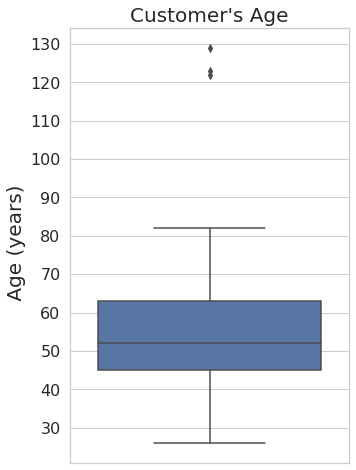

In [49]:
sns.set(style = 'whitegrid',rc={'figure.figsize':(5,8)})
ax = sns.boxplot(y=df_silver.Age)
ax.axes.set_title("Customer's Age",fontsize=20)
ax.set_ylabel(" Age (years)",fontsize=20)
ax.tick_params(labelsize=16)
ax.yaxis.set_major_locator(plt.MultipleLocator(10)) 

We can see a minimum value at 24 years and a maximum value at 80 years, excluding outliers close to 120 years. The average age is 50 years. 25% of customers are under 43 years old, 75% are under 61 years old and 25% are between 61 and 80 years old.



In [144]:
cond = df_silver.Age > 90
df_silver = df_silver[~cond]
df_silver.shape

(2209, 47)

In [51]:
df_silver.dtypes

ID                              int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Total Campai

In [52]:
df.shape

(2236, 34)

### Creating categorical variables based on quartiles



In [53]:
df['Total Purchases'].quantile([0.25,0.5,0.75])

0.25     6.0
0.50    12.0
0.75    18.0
Name: Total Purchases, dtype: float64

In [54]:
def cat_purchase(n):
    if n==0:
        return 'None'
    elif n > 0 and n < 6:
        return 'Very Low'
    elif n >= 6 and n < 12:
        return 'Low'
    elif n >= 12 and n < 18:
        return 'Mid'
    elif n >= 18:
        return 'High'

In [55]:
df['Total Spent'].quantile([0.25,0.5,0.75])

0.25     55.0
0.50    340.5
0.75    962.5
Name: Total Spent, dtype: float64

In [56]:
def cat_spend(n):
    if n == 0:
        return 'None'
    elif n > 0 and n <55:
        return 'Low'
    elif n >= 55 and n < 340.5:
        return 'Lower Mid'
    elif n >= 340.5 and n < 962.5:
        return 'Higher Mid'
    elif n >= 962.5:
        return 'Top'

In [57]:
df['Recency'].quantile([0.25,0.5,0.75])

0.25    24.0
0.50    49.0
0.75    74.0
Name: Recency, dtype: float64

In [58]:
#Categorize customers by recency
def cat_recency(n):
    if n == 0:
        return 'Very Active'
    elif n > 0 and n < 24:
        return 'Active'
    elif  n >= 24 and n < 49:
        return 'Higher Mid Active'
    elif n >= 49 and n < 74:
        return 'Lower Mid Active'
    elif n >= 74:
        return 'Not Active'

In [59]:
df['MntGoldProds'].quantile([0.25,0.5,0.75])

0.25     9.0
0.50    24.0
0.75    56.0
Name: MntGoldProds, dtype: float64

In [60]:
#Categorize customers by number of purchased Gold prods
def cat_gold(n):
    if n == 0:
        return 'None'
    elif n > 0 and n < 9:
        return 'Low'
    elif n >= 9 and n < 24:
        return 'Lower Mid'
    elif n >= 24 and n < 56:
        return 'Higher Mid'
    elif n >= 56:
        return 'Top'

In [61]:
#Categorize customers by number of offers accepted from previous campaigns
def cat_accepted(n):
    if n == 0:
        return 'None'
    elif n == 1:
        return 'Low'
    elif n == 2:
        return 'Lower Mid'
    elif n == 3:
        return 'Higher Mid'
    elif n == 4:
        return 'Top'

In [62]:
def spendPurchase(s,p):
    
    sp = 0
    
    if s == 0 or p == 0:
        return sp
    else:
        sp = round((s/p),2)
        return sp

In [63]:
#Get the percentage value of a feature. E.g. percentage spent on each product
def percentage(n, t):
    
    perc = 0
    
    if n == 0 or t == 0:
        return perc
    
    else:
        perc = round((n * 100)/t,2)
        return perc

In [64]:
#Total Spent on products
df['Spend Category'] = df['Total Spent'].apply(cat_spend)

#Total number of purchases
df['Purchases Category'] = df['Total Purchases'].apply(cat_purchase)

#Number of offers accepted from previous campaigns
df['Campaigns Category'] = df['Total Campaigns'].apply(cat_accepted)

#Number of days since the last purchase - Recency
df['Recency Category'] = df['Recency'].apply(cat_recency)

#Number of purchases of Gold Products
df['Gold Prods Category'] = df['MntGoldProds'].apply(cat_gold)

In [65]:

#Total spent per purchase
df['Spend per Purchase'] =df.apply(lambda row: spendPurchase(row['Total Spent'], row['Total Purchases']),axis=1)

In [66]:
#Percentage of money spend on each product
df['Wines %'] = df.apply(lambda row: percentage(row['MntWines'], row['Total Spent']),axis=1)
df['Meat %'] = df.apply(lambda row: percentage(row['MntMeatProducts'], row['Total Spent']),axis=1)
df['Fish %'] = df.apply(lambda row: percentage(row['MntFishProducts'], row['Total Spent']),axis=1)
df['Sweet %'] = df.apply(lambda row: percentage(row['MntSweetProducts'], row['Total Spent']),axis=1)
df['Fruits %'] = df.apply(lambda row: percentage(row['MntFruits'], row['Total Spent']),axis=1)

In [67]:
df['Store %'] = df.apply(lambda row: percentage(row['NumStorePurchases'], row['Total Purchases']),axis=1)
df['Web %'] = df.apply(lambda row: percentage(row['NumWebPurchases'], row['Total Purchases']),axis=1)
df['Catalog %'] = df.apply(lambda row: percentage(row['NumCatalogPurchases'], row['Total Purchases']),axis=1)

In [68]:
#Spend per Purchase quantiles
df['Spend per Purchase'].quantile([0.25,0.5,0.75])

0.25    10.2500
0.50    26.2500
0.75    44.4525
Name: Spend per Purchase, dtype: float64

In [69]:
#Categorize customers by number of purchased Gold prods
def cat_spendPurchase(n):
    if n == 0:
        return 'None'
    elif n > 0 and n < 10.25:
        return 'Low'
    elif n >= 10.25 and n < 26.320513:
        return 'Mid'
    elif n >= 26.320513 and n < 44.675549:
        return 'High'
    elif n >= 44.675549:
        return 'Top'

In [70]:
df['Spend/Purchase Category'] = df['Spend per Purchase'].apply(cat_spendPurchase)

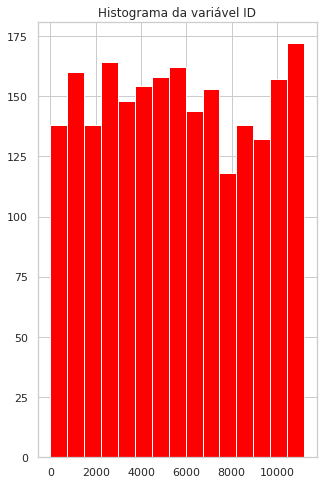

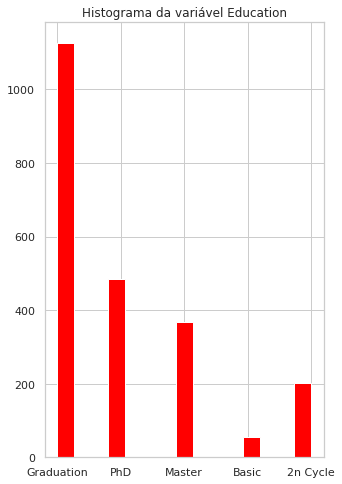

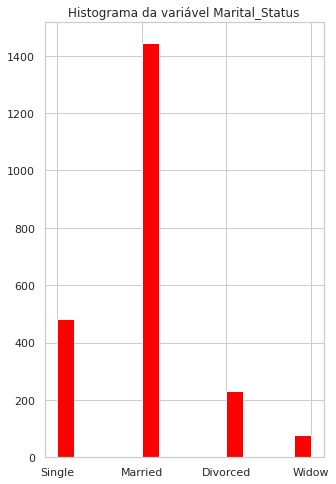

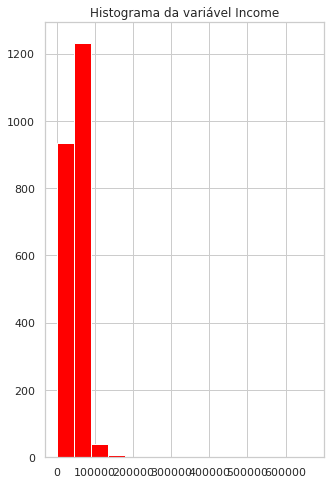

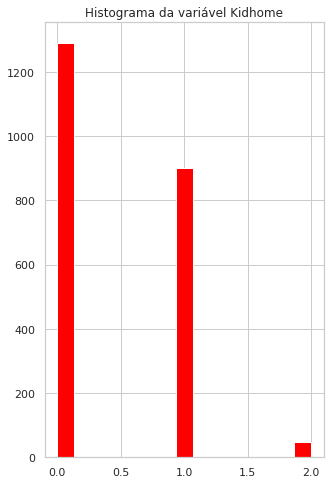

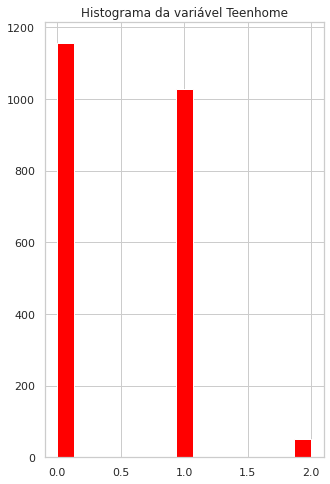

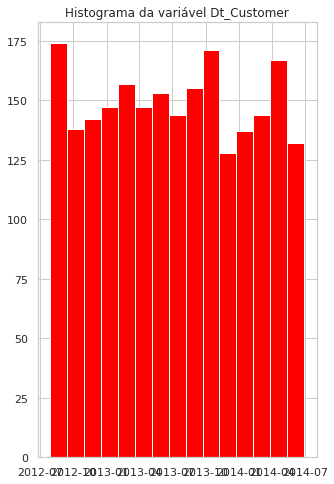

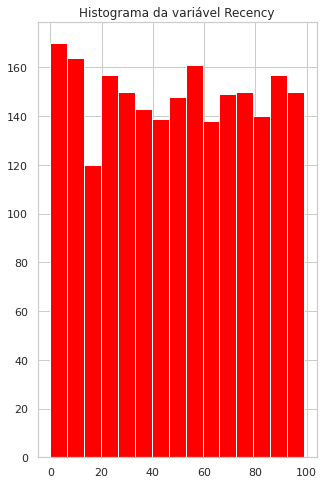

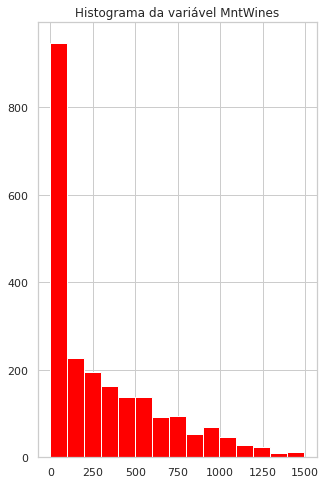

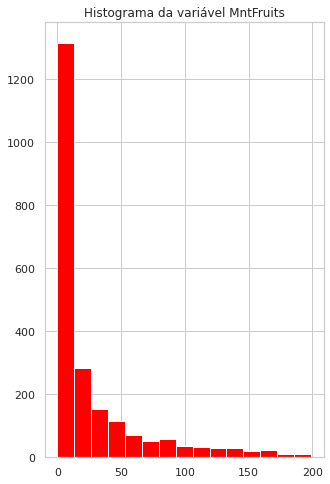

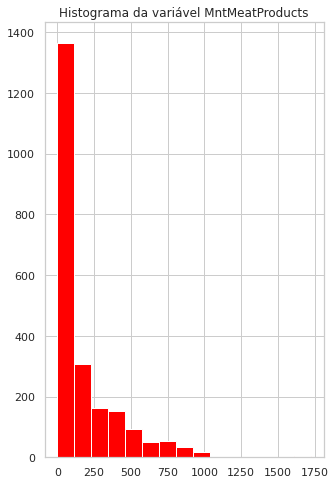

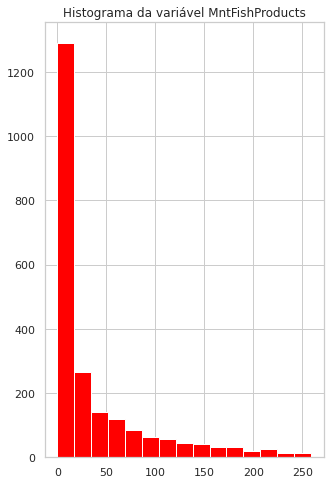

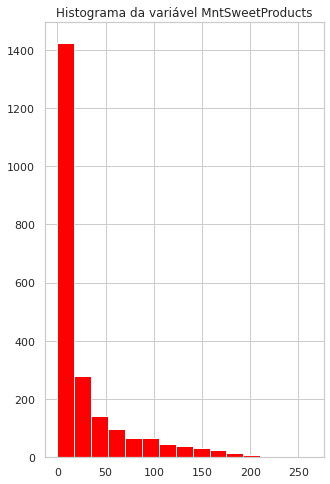

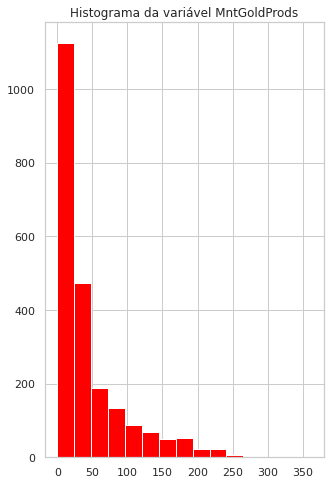

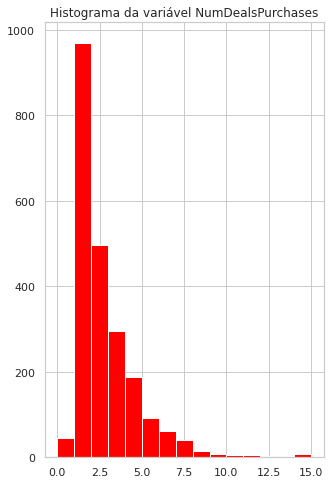

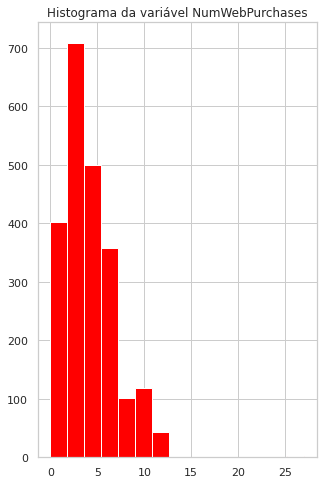

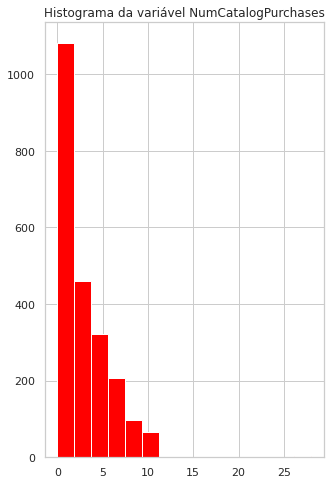

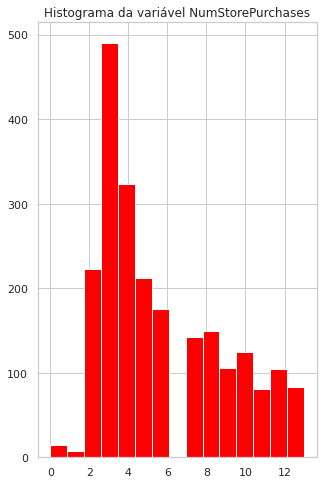

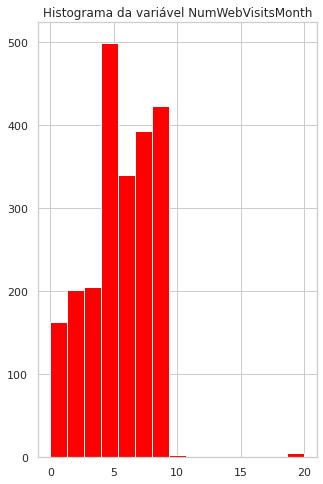

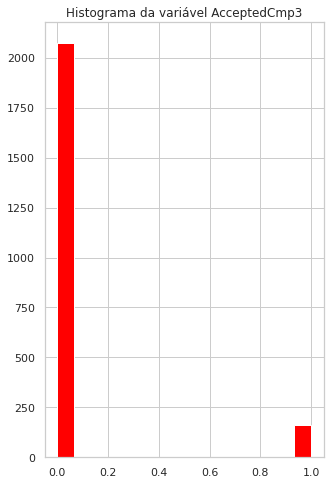

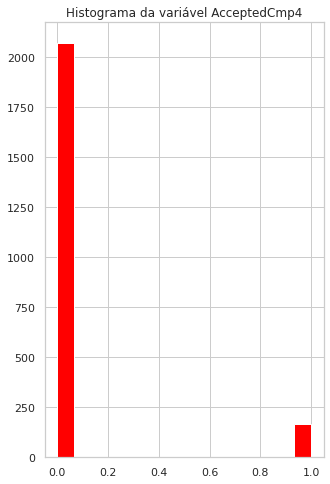

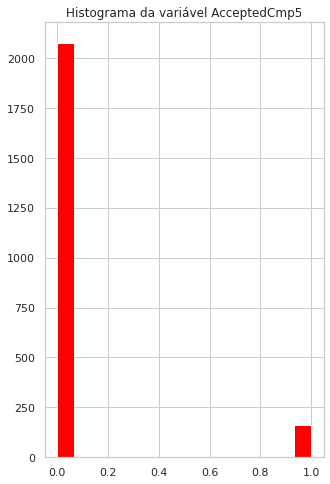

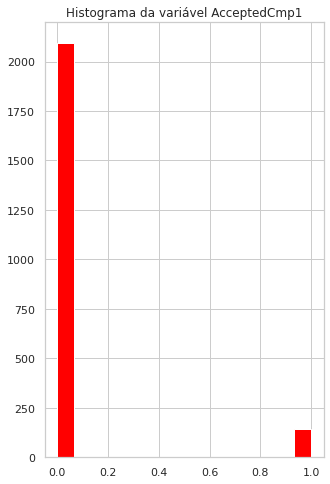

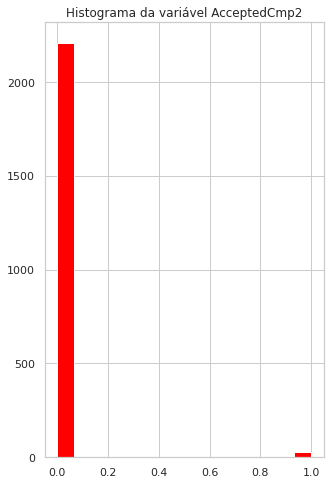

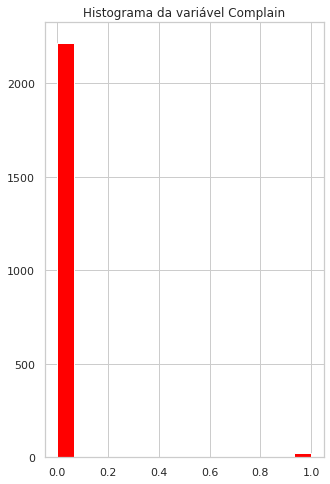

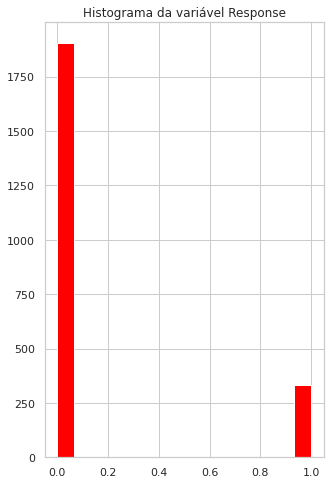

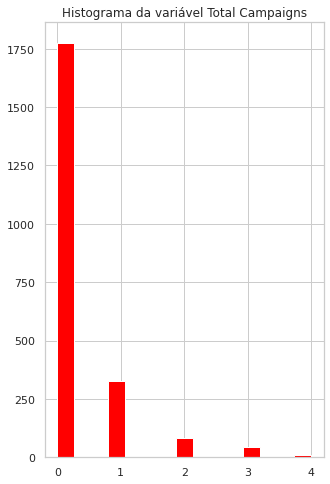

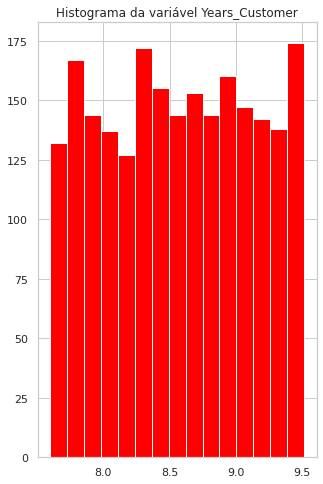

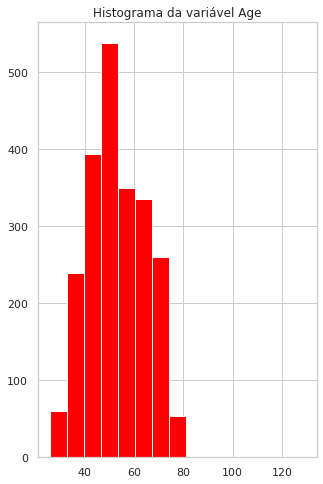

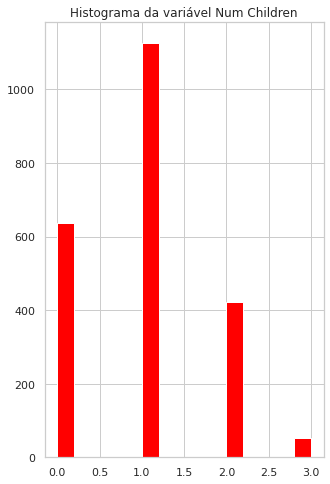

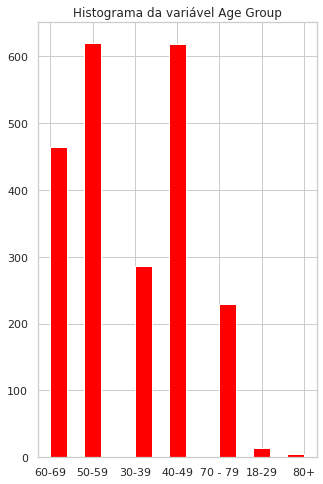

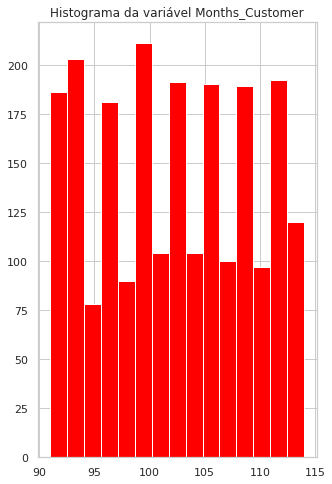

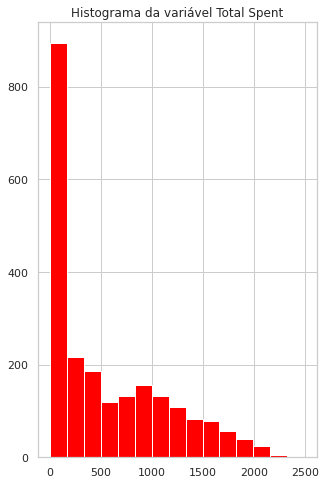

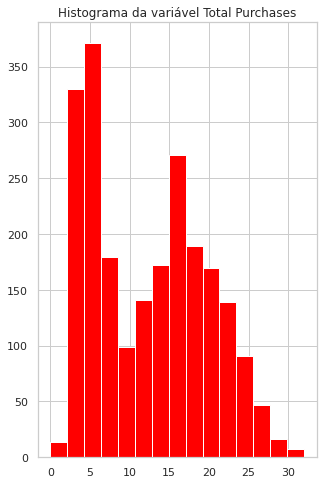

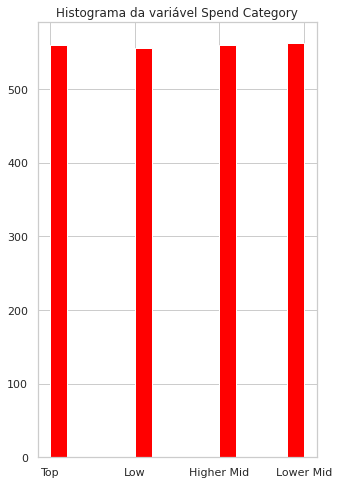

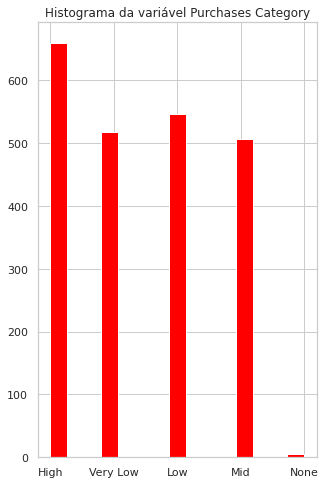

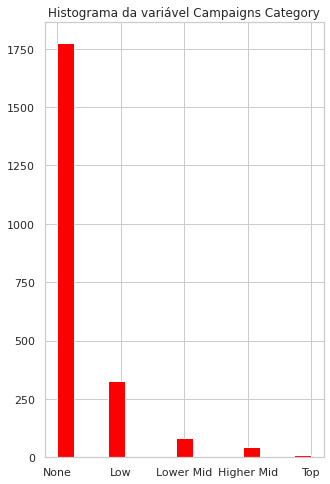

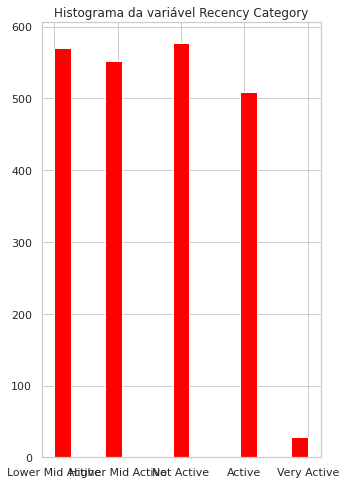

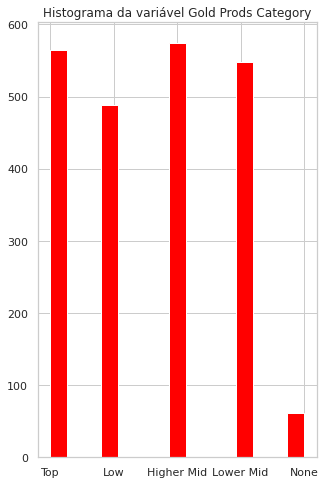

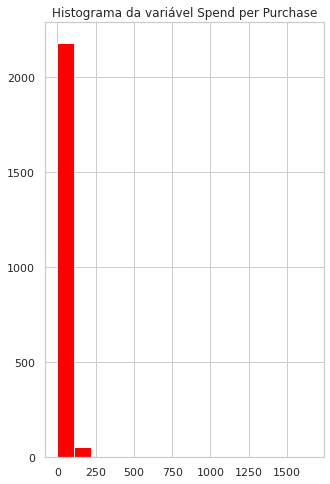

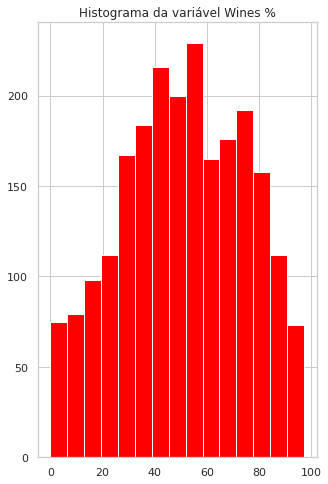

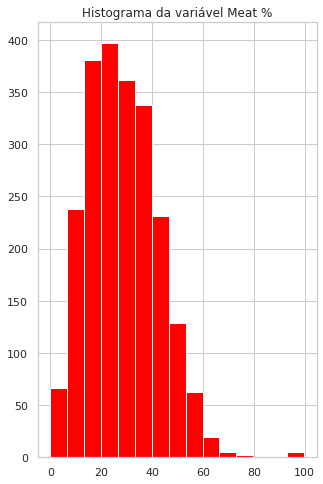

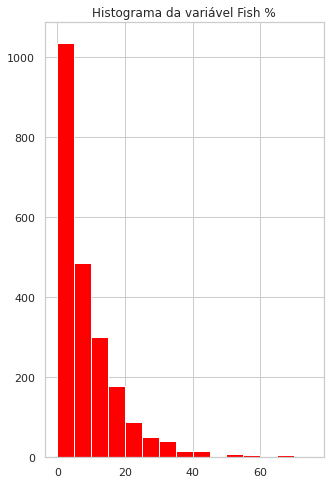

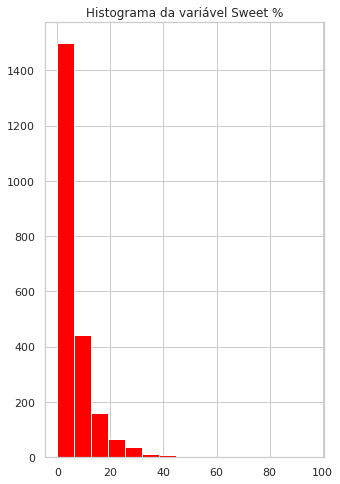

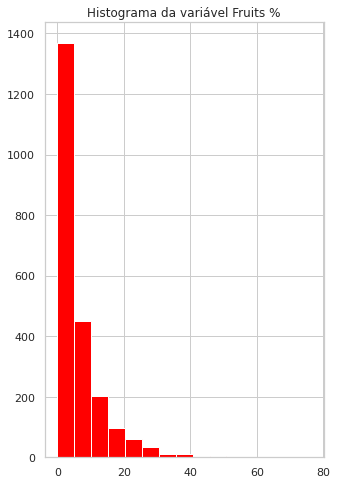

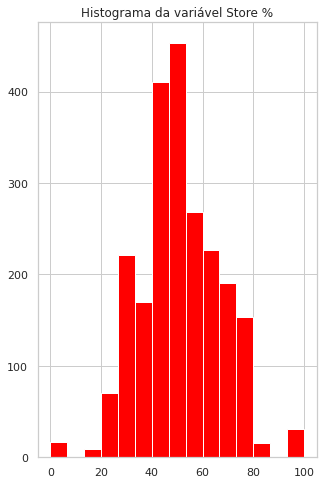

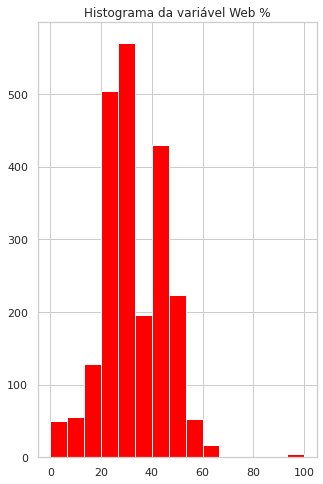

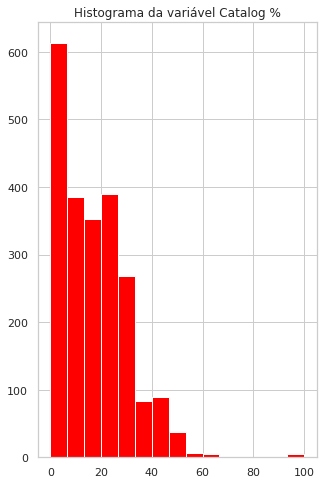

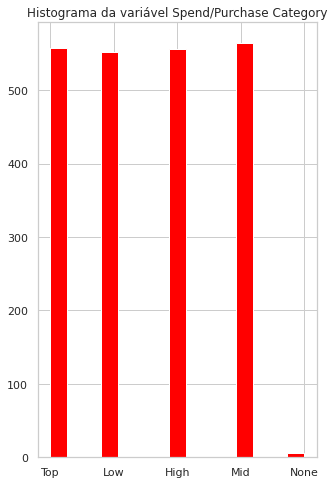

In [71]:
geraHistogramaTodasColunas(df)

In [72]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total Campaigns', 'Years_Customer', 'Age',
       'Num Children', 'Age Group', 'Months_Customer', 'Total Spent',
       'Total Purchases', 'Spend Category', 'Purchases Category',
       'Campaigns Category', 'Recency Category', 'Gold Prods Category',
       'Spend per Purchase', 'Wines %', 'Meat %', 'Fish %', 'Sweet %',
       'Fruits %', 'Store %', 'Web %', 'Catalog %', 'Spend/Purchase Category'],
      dtype='object')

In [73]:
#Replacing columns names with proper/readable names 
df.rename(columns={
    'Marital_Status': 'Marital', 
    'Kidhome': 'Num Kid', 'Teenhome': 'Num Teen',
    'MntWines': 'Wines','MntFruits': 'Fruits','MntMeatProducts': 'Meat Prods', 'MntFishProducts': 'Fish Prods', 'MntSweetProducts': 'Sweet Prods','MntGoldProds': 'Gold Prods',
    'NumDealsPurchases': 'Deals Purchases','NumWebPurchases': 'Web Purchases', 'NumCatalogPurchases': 'Catalog Purchases', 'NumStorePurchases': 'Store Purchases',
    'NumWebVisitsMonth': 'Web Visits',
    'AcceptedCmp1': 'Campaign 1', 'AcceptedCmp2': 'Campaign 2','AcceptedCmp3': 'Campaign 3','AcceptedCmp4': 'Campaign 4','AcceptedCmp5': 'Campaign 5'}, inplace=True)

In [74]:
df_silver = df.filter([
    'ID',
    'Age', 'Age Group','Marital','Education','Income',
    'Num Kid','Num Teen','Num Children',
    'Months_Customer',
    'Recency', 'Recency Category',
    'Wines','Wines %','Fruits','Fruits %','Meat Prods','Meat %', 'Fish Prods', 'Fish %','Sweet Prods','Sweet %','Gold Prods', 'Gold Prods Category',
    'Total Spent', 'Spend Category',
    'Deals Purchases', 'Web Purchases','Web %','Catalog Purchases','Catalog %','Store Purchases', 'Store %',
    'Total Purchases', 'Purchases Category',
    'Spend per Purchase','Spend/Purchase Category',
    'Web Visits', 
    'Complain',
    'Campaign 1','Campaign 2','Campaign 3', 'Campaign 4', 'Campaign 5', 'Total Campaigns', 'Campaigns Category',
    'Response'], axis=1)

In [75]:
df_silver.head(6)

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response
0,5524,65,60-69,Single,Graduation,58138.0,0,0,0,112,...,7,0,0,0,0,0,0,0,None,1
1,2174,68,60-69,Single,Graduation,46344.0,1,1,2,94,...,5,0,0,0,0,0,0,0,None,0
2,4141,57,50-59,Married,Graduation,71613.0,0,0,0,101,...,4,0,0,0,0,0,0,0,None,0
3,6182,38,30-39,Married,Graduation,26646.0,1,0,1,95,...,6,0,0,0,0,0,0,0,None,0
4,5324,41,40-49,Married,PhD,58293.0,1,0,1,96,...,5,0,0,0,0,0,0,0,None,0
5,7446,55,50-59,Married,Master,62513.0,0,1,1,100,...,6,0,0,0,0,0,0,0,None,0


In [76]:
df_silver.shape

(2236, 47)

In [77]:
df_silver.dtypes

ID                           int64
Age                          int64
Age Group                   object
Marital                     object
Education                   object
Income                     float64
Num Kid                      int64
Num Teen                     int64
Num Children                 int64
Months_Customer              int64
Recency                      int64
Recency Category            object
Wines                        int64
Wines %                    float64
Fruits                       int64
Fruits %                   float64
Meat Prods                   int64
Meat %                     float64
Fish Prods                   int64
Fish %                     float64
Sweet Prods                  int64
Sweet %                    float64
Gold Prods                   int64
Gold Prods Category         object
Total Spent                  int64
Spend Category              object
Deals Purchases              int64
Web Purchases                int64
Web %               

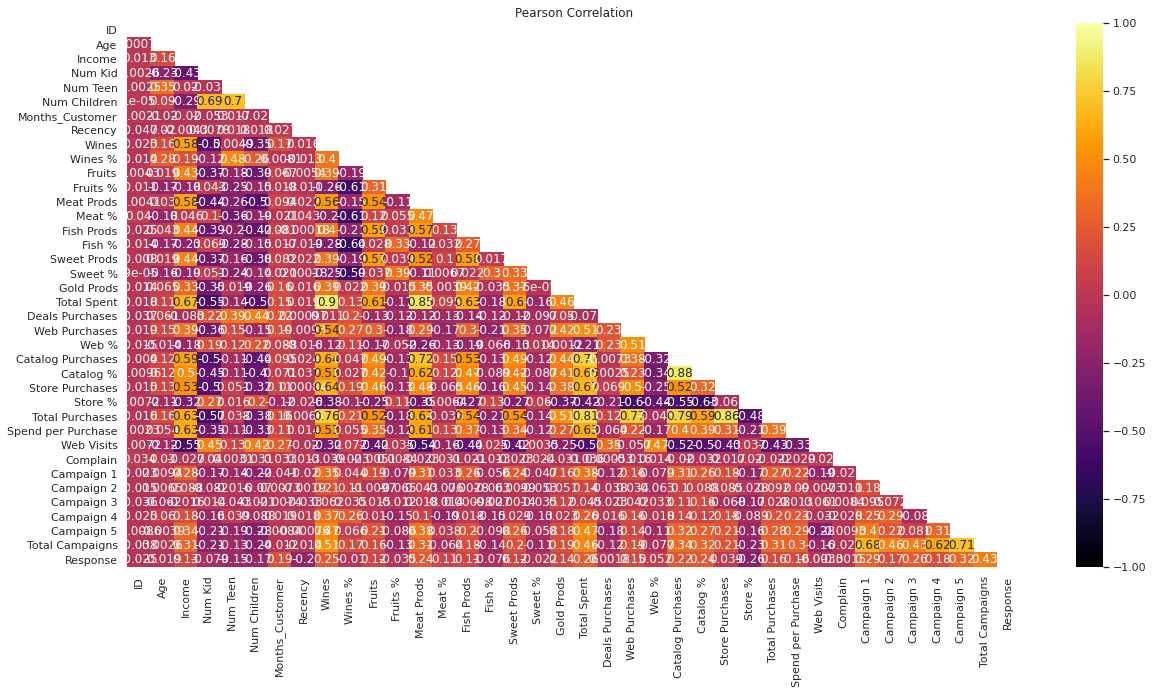

In [78]:
#Check corr between features - customers_ifood 

customers_corr = df_silver.corr(method = 'pearson')
fig = plt.figure(figsize = (20, 10))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()

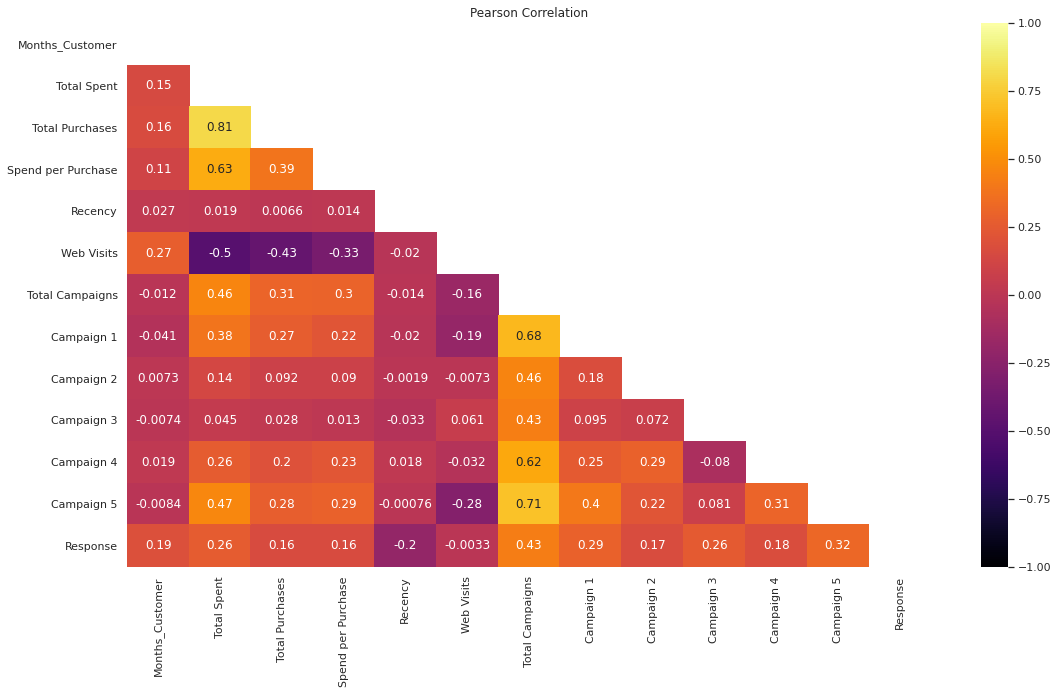

In [79]:
#Check corr between customer's behavioural features. Closer look at them.

cust_corr = df_silver.filter([
    'Months_Customer',
    'Total Spent',
    'Total Purchases',
    'Spend per Purchase',
    'Recency',
    'Web Visits',
    'Total Campaigns',
    'Campaign 1',
    'Campaign 2',
    'Campaign 3',
    'Campaign 4',
    'Campaign 5',
    'Response'],axis=1)

customers_corr = cust_corr.corr(method = 'pearson')
fig = plt.figure(figsize = (18, 10))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()

In [80]:
df_silver.info

<bound method DataFrame.info of          ID  Age Age Group   Marital   Education   Income  Num Kid  Num Teen  \
0      5524   65     60-69    Single  Graduation  58138.0        0         0   
1      2174   68     60-69    Single  Graduation  46344.0        1         1   
2      4141   57     50-59   Married  Graduation  71613.0        0         0   
3      6182   38     30-39   Married  Graduation  26646.0        1         0   
4      5324   41     40-49   Married         PhD  58293.0        1         0   
...     ...  ...       ...       ...         ...      ...      ...       ...   
2235  10870   55     50-59   Married  Graduation  61223.0        0         1   
2236   4001   76   70 - 79   Married         PhD  64014.0        2         1   
2237   7270   41     40-49  Divorced  Graduation  56981.0        0         0   
2238   8235   66     60-69   Married      Master  69245.0        0         1   
2239   9405   68     60-69   Married         PhD  52869.0        1         1   

      N

### Perfil do Cliente

In [81]:
#Split the data to check customer's profile

#Customers who accepted at least 1 offer from previous campaigns
cmp = (df_silver['Total Campaigns'] >= 1)
accepted = df_silver[cmp]

# Customers that never accepted any offer from campaigns 1 to 5
not_accepted = df_silver[~cmp]

In [82]:
accepted.shape

(462, 47)

In [83]:
accepted.head()

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response
9,5899,72,70 - 79,Married,PhD,5648.0,1,1,2,94,...,20,0,0,0,1,0,0,1,Low,0
15,2114,76,70 - 79,Single,PhD,82800.0,0,0,0,110,...,3,0,1,0,0,0,1,2,Lower Mid,1
18,6565,73,70 - 79,Married,Master,76995.0,0,1,1,106,...,5,0,1,0,0,0,0,1,Low,0
22,1993,73,70 - 79,Married,PhD,58607.0,0,1,1,109,...,8,0,0,0,0,1,0,1,Low,0
29,1966,57,50-59,Married,PhD,84618.0,0,0,0,98,...,2,0,0,0,0,0,1,1,Low,0


In [84]:
not_accepted.head()

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response
0,5524,65,60-69,Single,Graduation,58138.0,0,0,0,112,...,7,0,0,0,0,0,0,0,None,1
1,2174,68,60-69,Single,Graduation,46344.0,1,1,2,94,...,5,0,0,0,0,0,0,0,None,0
2,4141,57,50-59,Married,Graduation,71613.0,0,0,0,101,...,4,0,0,0,0,0,0,0,None,0
3,6182,38,30-39,Married,Graduation,26646.0,1,0,1,95,...,6,0,0,0,0,0,0,0,None,0
4,5324,41,40-49,Married,PhD,58293.0,1,0,1,96,...,5,0,0,0,0,0,0,0,None,0


In [85]:
# Check characteristics of customers who accepted offers from previous campaigns

#Social economic characteristics

# Age
customers_accepted=accepted.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Age Group"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

customersAge =(pd.merge(customers_accepted,customers_not_accepted,on='Age Group'))
customersAge = customersAge.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
customersAge

,Age Group,accepted,accepted%,not_accepted,not_accepted%
0,18-29,4,0.87,10,0.56
1,30-39,64,13.85,222,12.51
2,40-49,113,24.46,505,28.47
3,50-59,117,25.32,503,28.35
4,60-69,106,22.94,358,20.18
5,70 - 79,56,12.12,173,9.75
6,80+,2,0.43,3,0.17


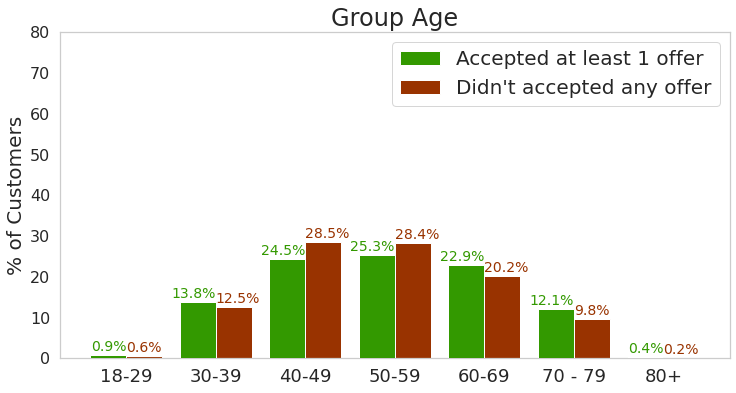

In [86]:
#plot a barplot of the two groups together
fig, ax = plt.subplots(figsize = (12,6))
vtext = np.vectorize(ax.text)

x1 = customersAge["Age Group"]
y1 = customersAge["accepted%"]

x2 = customersAge["Age Group"]
y2 = customersAge["not_accepted%"]



rects1 = ax.bar(x1,y1,width =-0.4,label='Accepted at least 1 offer',zorder=3,color='#339900',align='edge')

rects2 = ax.bar(x1,y2,width =0.4,label="Didn't accepted any offer",zorder=2,color='#993300',align='edge')

for i in range(len(y1)):  
    ax.text(x1[i], y1[i]+1,np.str(np.round(y1[i],decimals=1)) + '%',fontsize =14,ha= 'right',color='#339900',rotation='horizontal')
    ax.text(x2[i],y2[i]+1,np.str(np.round(y2[i],decimals=1)) + '%',fontsize = 14,ha= 'left',color='#993300',rotation='horizontal')


# organizing the labels and axis
ax.set_ylabel('% of Customers',fontsize=20)
ax.set_title('Group Age',fontsize=24)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0,80)
plt.xticks(fontsize = 18,rotation='horizontal')
plt.yticks(fontsize = 16)

ax.grid(zorder=0)
ax.legend(fontsize=20)

In [87]:
#Marital Status
customers_accepted=accepted.groupby(["Marital"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Marital"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

MaritalStatus=(pd.merge(customers_accepted,customers_not_accepted,on='Marital'))
MaritalStatus = MaritalStatus.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
MaritalStatus

,Marital,accepted,accepted%,not_accepted,not_accepted%
0,Divorced,46,9.96,186,10.48
1,Married,298,64.50,1146,64.60
2,Single,99,21.43,384,21.65
3,Widow,19,4.11,58,3.27


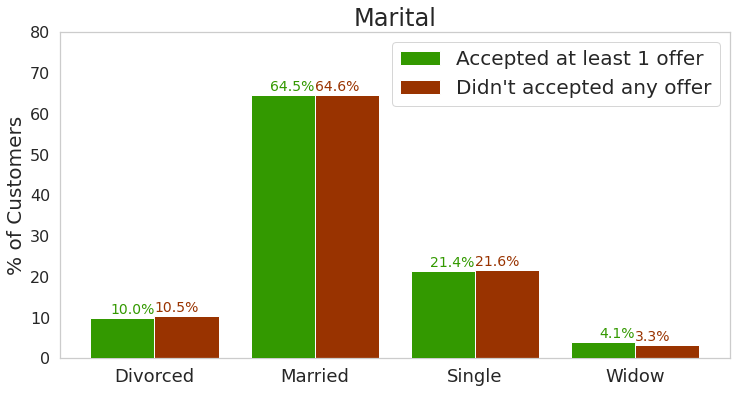

In [88]:
#plot a barplot 
fig, ax = plt.subplots(figsize = (12,6))
vtext = np.vectorize(ax.text)

x1 = MaritalStatus["Marital"]
y1 = MaritalStatus["accepted%"]

x2 = MaritalStatus["Marital"]
y2 = MaritalStatus["not_accepted%"]



rects1 = ax.bar(x1,y1,width =-0.4,label='Accepted at least 1 offer',zorder=3,color='#339900',align='edge')

rects2 = ax.bar(x1,y2,width =0.4,label="Didn't accepted any offer",zorder=2,color='#993300',align='edge')

for i in range(len(y1)):  
    ax.text(x1[i], y1[i]+1,np.str(np.round(y1[i],decimals=1)) + '%',fontsize =14,ha= 'right',color='#339900',rotation='horizontal')
    ax.text(x2[i],y2[i]+1,np.str(np.round(y2[i],decimals=1)) + '%',fontsize = 14,ha= 'left',color='#993300',rotation='horizontal')


# organizing the labels and axis
ax.set_ylabel('% of Customers',fontsize=20)
ax.set_title('Marital',fontsize=24)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0,80)
plt.xticks(fontsize = 18,rotation='horizontal')
plt.yticks(fontsize = 16)

ax.grid(zorder=0)
ax.legend(fontsize=20)

In [89]:
#Education - accepted 1 or more campaigns
customers_accepted=accepted.groupby(["Education"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Education"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

EducationLevel=(pd.merge(customers_accepted,customers_not_accepted,on='Education'))
EducationLevel = EducationLevel.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
EducationLevel

,Education,accepted,accepted%,not_accepted,not_accepted%
0,2n Cycle,38,8.23,165,9.30
1,Basic,6,1.30,48,2.71
2,Graduation,229,49.57,897,50.56
3,Master,75,16.23,294,16.57
4,PhD,114,24.68,370,20.86


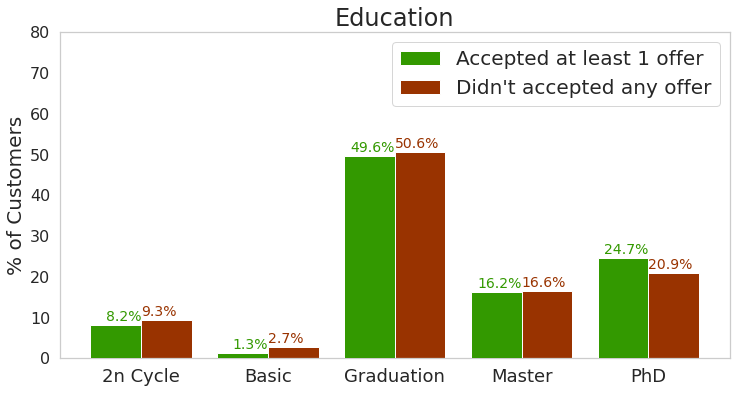

In [90]:
#plot a barplot 
fig, ax = plt.subplots(figsize = (12,6))
vtext = np.vectorize(ax.text)

x1 = EducationLevel["Education"]
y1 = EducationLevel["accepted%"]

x2 = EducationLevel["Education"]
y2 = EducationLevel["not_accepted%"]



rects1 = ax.bar(x1,y1,width =-0.4,label='Accepted at least 1 offer',zorder=3,color='#339900',align='edge')

rects2 = ax.bar(x1,y2,width =0.4,label="Didn't accepted any offer",zorder=2,color='#993300',align='edge')

for i in range(len(y1)):  
    ax.text(x1[i], y1[i]+1,np.str(np.round(y1[i],decimals=1)) + '%',fontsize =14,ha= 'right',color='#339900',rotation='horizontal')
    ax.text(x2[i],y2[i]+1,np.str(np.round(y2[i],decimals=1)) + '%',fontsize = 14,ha= 'left',color='#993300',rotation='horizontal')


# organizing the labels and axis
ax.set_ylabel('% of Customers',fontsize=20)
ax.set_title('Education',fontsize=24)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0,80)
plt.xticks(fontsize = 18,rotation='horizontal')
plt.yticks(fontsize = 16)

ax.grid(zorder=0)
ax.legend(fontsize=20)

In [91]:
#Category of total amount spent on products

customers_accepted=accepted.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Spend Category"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

SpendCat=(pd.merge(customers_accepted,customers_not_accepted,on='Spend Category'))
SpendCat = SpendCat.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
SpendCat

,Spend Category,accepted,accepted%,not_accepted,not_accepted%
0,Higher Mid,117,25.32,442,24.92
1,Low,48,10.39,508,28.64
2,Lower Mid,45,9.74,517,29.14
3,Top,252,54.55,307,17.31


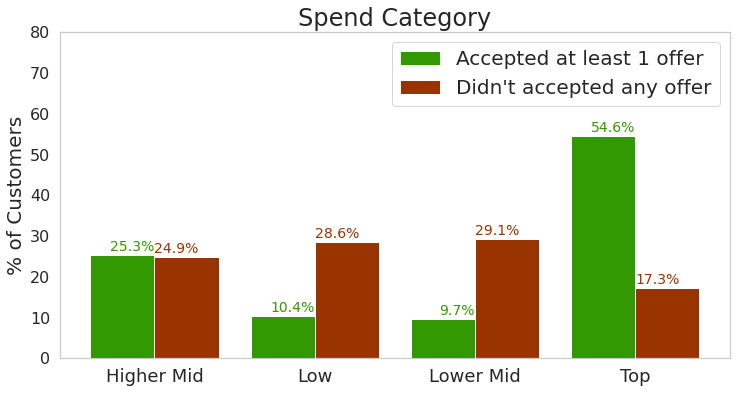

In [92]:
#plot a barplot 
fig, ax = plt.subplots(figsize = (12,6))
vtext = np.vectorize(ax.text)

x1 = SpendCat["Spend Category"]
y1 = SpendCat["accepted%"]

x2 = SpendCat["Spend Category"]
y2 = SpendCat["not_accepted%"]



rects1 = ax.bar(x1,y1,width =-0.4,label='Accepted at least 1 offer',zorder=3,color='#339900',align='edge')

rects2 = ax.bar(x1,y2,width =0.4,label="Didn't accepted any offer",zorder=2,color='#993300',align='edge')

for i in range(len(y1)):  
    ax.text(x1[i], y1[i]+1,np.str(np.round(y1[i],decimals=1)) + '%',fontsize =14,ha= 'right',color='#339900',rotation='horizontal')
    ax.text(x2[i],y2[i]+1,np.str(np.round(y2[i],decimals=1)) + '%',fontsize = 14,ha= 'left',color='#993300',rotation='horizontal')


# organizing the labels and axis
ax.set_ylabel('% of Customers',fontsize=20)
ax.set_title('Spend Category',fontsize=24)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0,80)
plt.xticks(fontsize = 18,rotation='horizontal')
plt.yticks(fontsize = 16)

ax.grid(zorder=0)
ax.legend(fontsize=20)

In [93]:
# Category amount spend on Products per purchase

customers_accepted=accepted.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Spend/Purchase Category"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

Spend_purchase =(pd.merge(customers_accepted,customers_not_accepted,on='Spend/Purchase Category'))
Spend_purchase = Spend_purchase.rename(columns = {'ID_x': 'Yes', 'ID_y': 'No'}, inplace = False)
Spend_purchase

,Spend/Purchase Category,Yes,accepted%,No,not_accepted%
0,High,107,23.16,449,25.31
1,Low,44,9.52,508,28.64
2,Mid,56,12.12,508,28.64
3,Top,255,55.19,303,17.08


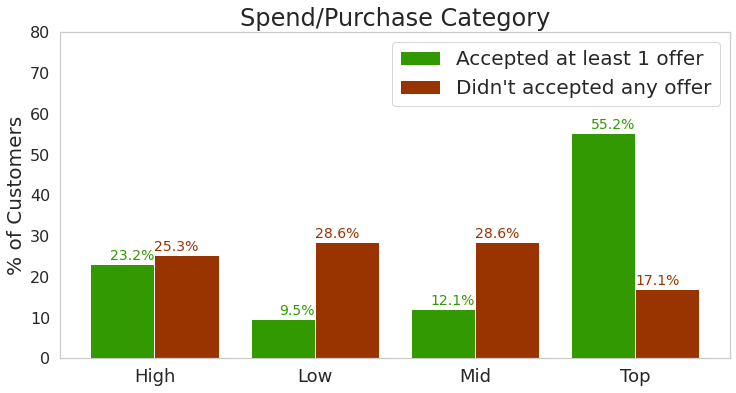

In [94]:
#plot a barplot 
fig, ax = plt.subplots(figsize = (12,6))
vtext = np.vectorize(ax.text)

x1 = Spend_purchase["Spend/Purchase Category"]
y1 = Spend_purchase["accepted%"]

x2 = Spend_purchase["Spend/Purchase Category"]
y2 = Spend_purchase["not_accepted%"]



rects1 = ax.bar(x1,y1,width =-0.4,label='Accepted at least 1 offer',zorder=3,color='#339900',align='edge')

rects2 = ax.bar(x1,y2,width =0.4,label="Didn't accepted any offer",zorder=2,color='#993300',align='edge')

for i in range(len(y1)):  
    ax.text(x1[i], y1[i]+1,np.str(np.round(y1[i],decimals=1)) + '%',fontsize =14,ha= 'right',color='#339900',rotation='horizontal')
    ax.text(x2[i],y2[i]+1,np.str(np.round(y2[i],decimals=1)) + '%',fontsize = 14,ha= 'left',color='#993300',rotation='horizontal')


# organizing the labels and axis
ax.set_ylabel('% of Customers',fontsize=20)
ax.set_title('Spend/Purchase Category',fontsize=24)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0,80)
plt.xticks(fontsize = 18,rotation='horizontal')
plt.yticks(fontsize = 16)

ax.grid(zorder=0)
ax.legend(fontsize=20)

In [95]:
#Category number of days since the last purchase (Recency)

customers_accepted=accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

customersRecency=(pd.merge(customers_accepted,customers_not_accepted,on='Recency Category'))
customersRecency = customersRecency.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
customersRecency

,Recency Category,accepted,accepted%,not_accepted,not_accepted%
0,Active,111,24.03,398,22.44
1,Higher Mid Active,120,25.97,432,24.35
2,Lower Mid Active,119,25.76,451,25.42
3,Not Active,109,23.59,468,26.38
4,Very Active,3,0.65,25,1.41


In [96]:
#Category number of days since the last purchase (Recency)

customers_accepted=accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Recency Category"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

customersRecency=(pd.merge(customers_accepted,customers_not_accepted,on='Recency Category'))
customersRecency = customersRecency.rename(columns = {'ID_x': 'accepted', 'ID_y': 'accepted'}, inplace = False)
customersRecency

,Recency Category,accepted,accepted%,accepted,not_accepted%
0,Active,111,24.03,398,22.44
1,Higher Mid Active,120,25.97,432,24.35
2,Lower Mid Active,119,25.76,451,25.42
3,Not Active,109,23.59,468,26.38
4,Very Active,3,0.65,25,1.41


In [97]:
#Engagement on company's website (number of visits to company's website last month)

customers_accepted=accepted.groupby(["Web Visits"])["ID"].nunique().reset_index()
customers_not_accepted=not_accepted.groupby(["Web Visits"])["ID"].nunique().reset_index()
customers_accepted["accepted%"] = round(100*(customers_accepted['ID']/(customers_accepted['ID'].sum())),2)
customers_not_accepted["not_accepted%"] = round(100*(customers_not_accepted['ID']/(customers_not_accepted['ID'].sum())),2)

WebVisits=(pd.merge(customers_accepted,customers_not_accepted,on='Web Visits'))
WebVisits = WebVisits.rename(columns = {'ID_x': 'accepted', 'ID_y': 'not_accepted'}, inplace = False)
WebVisits

,Web Visits,accepted,accepted%,not_accepted,not_accepted%
0,0,1,0.22,10,0.56
1,1,52,11.26,100,5.64
2,2,67,14.50,134,7.55
3,3,54,11.69,151,8.51
4,4,44,9.52,174,9.81
5,5,43,9.31,238,13.42
6,6,70,15.15,270,15.22
7,7,62,13.42,331,18.66
8,8,51,11.04,289,16.29
9,9,17,3.68,66,3.72


# 2. Customer Segmentation  <a class="anchor" id="segmentacao_cliente"></a>

In [98]:
data = df_silver
data.head()

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response
0,5524,65,60-69,Single,Graduation,58138.0,0,0,0,112,...,7,0,0,0,0,0,0,0,None,1
1,2174,68,60-69,Single,Graduation,46344.0,1,1,2,94,...,5,0,0,0,0,0,0,0,None,0
2,4141,57,50-59,Married,Graduation,71613.0,0,0,0,101,...,4,0,0,0,0,0,0,0,None,0
3,6182,38,30-39,Married,Graduation,26646.0,1,0,1,95,...,6,0,0,0,0,0,0,0,None,0
4,5324,41,40-49,Married,PhD,58293.0,1,0,1,96,...,5,0,0,0,0,0,0,0,None,0


In [99]:
data.shape

(2236, 47)

In [100]:
data.columns

Index(['ID', 'Age', 'Age Group', 'Marital', 'Education', 'Income', 'Num Kid',
       'Num Teen', 'Num Children', 'Months_Customer', 'Recency',
       'Recency Category', 'Wines', 'Wines %', 'Fruits', 'Fruits %',
       'Meat Prods', 'Meat %', 'Fish Prods', 'Fish %', 'Sweet Prods',
       'Sweet %', 'Gold Prods', 'Gold Prods Category', 'Total Spent',
       'Spend Category', 'Deals Purchases', 'Web Purchases', 'Web %',
       'Catalog Purchases', 'Catalog %', 'Store Purchases', 'Store %',
       'Total Purchases', 'Purchases Category', 'Spend per Purchase',
       'Spend/Purchase Category', 'Web Visits', 'Complain', 'Campaign 1',
       'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5',
       'Total Campaigns', 'Campaigns Category', 'Response'],
      dtype='object')

## 2.2 Preparing the data

In [101]:
#Create df with RFM features
data_rfm=pd.DataFrame()
data_rfm["ID"] = data['ID']
data_rfm["Recency"] = data['Recency']
data_rfm["Frequency"] = data['Total Purchases']
data_rfm["Monetary"]=data['Total Spent']

data_rfm.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,1529
1,2174,38,4,21
2,4141,26,20,734
3,6182,26,6,48
4,5324,94,14,407


In [102]:
# Give a score value to which attribute accordingly to its quartile values. The higher the score, the better the client
data_rfm['r_score'] = pd.qcut(data_rfm['Recency'], 4, [4,3,2,1])
data_rfm['f_score'] = pd.qcut(data_rfm['Frequency'], 4, [1,2,3,4])
data_rfm['m_score'] = pd.qcut(data_rfm['Monetary'], 4, [1,2,3,4])
data_rfm.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score
0,5524,58,22,1529,2,4,4
1,2174,38,4,21,3,1,1
2,4141,26,20,734,3,4,3
3,6182,26,6,48,3,1,1
4,5324,94,14,407,1,3,3


In [103]:
data_rfm['r_score']=data_rfm.r_score.astype('int64')
data_rfm['f_score']=data_rfm.f_score.astype('int64')
data_rfm['m_score']=data_rfm.m_score.astype('int64')

In [104]:
#For this case the final score will be given by the sum of the 3 scores, giving the same weight for the 3 attributes
#The highest possible score is 12 and the lowest is 3
data_rfm['rfm_score'] = (data_rfm['r_score'] + data_rfm['f_score'] + data_rfm['m_score'])

In [105]:
#Let's label 5 groups based on the "rfm_score" value.
data_rfm['group'] = pd.cut(data_rfm['rfm_score'], [3,6,8,9,11,13],right = False, labels = ['Inferior','Low','Medium','High','Top'])

In [106]:
data_rfm.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group
0,5524,58,22,1529,2,4,4,10,High
1,2174,38,4,21,3,1,1,5,Inferior
2,4141,26,20,734,3,4,3,10,High
3,6182,26,6,48,3,1,1,5,Inferior
4,5324,94,14,407,1,3,3,7,Low


In [107]:
group_label=data_rfm.groupby(["group"])["ID"].nunique().reset_index()
group_label["perc_g"] = 100*(group_label.ID/(group_label.ID.sum()))

print(group_label)

      group   ID     perc_g
0  Inferior  603  26.967800
1       Low  493  22.048301
2    Medium  307  13.729875
3      High  554  24.776386
4       Top  279  12.477639


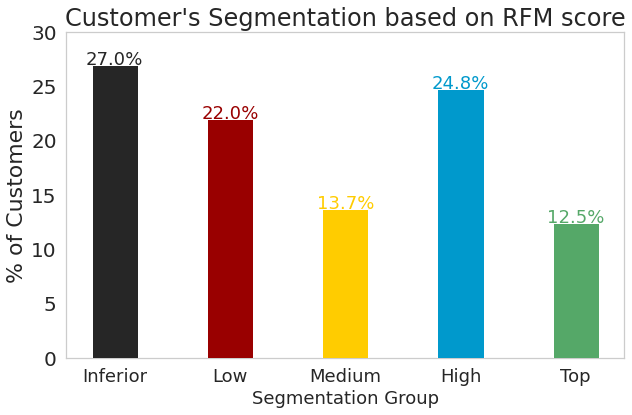

In [108]:
#Ploting the % of customer in each group
fig, ax = plt.subplots(figsize = (10,6))
vtext = np.vectorize(ax.text)

x1 = group_label.group
y1 = group_label.perc_g


my_colors=['#262626','#990000','#ffcc00','#0099cc','g']

for i in range(len(y1)):  
    ax.bar(x1[i],y1[i],width =-0.4,zorder=3,color=my_colors[i],align='center')
    ax.text(x1[i], y1[i],np.str(np.round(y1[i],decimals=1))+'%',fontsize =18,ha= 'center',color=my_colors[i],rotation='horizontal')
    


# organizing the labels and axis
ax.set_xlabel('Segmentation Group',fontsize=18)
ax.set_ylabel("% of Customers",fontsize=22)
ax.set_title("Customer's Segmentation based on RFM score",fontsize=24)

ax.set_ylim(0,30)
plt.xticks(fontsize = 18,rotation='horizontal',ha='center')
plt.yticks(fontsize = 20)

ax.grid(zorder=0)

In [109]:
# Calculating the median value for the Recency, Frequency and Monetary value for each group
group_r=data_rfm.groupby(["group"])["Recency"].median().reset_index()
group_f=data_rfm.groupby(["group"])["Frequency"].median().reset_index()
group_m=data_rfm.groupby(["group"])["Monetary"].median().reset_index()

In [110]:
median_rfm=pd.merge(pd.merge(group_r,group_f,on='group'),group_m,on='group')
median_rfm

,group,Recency,Frequency,Monetary
0,Inferior,71,5.0,40
1,Low,34,7.0,116
2,Medium,63,14.0,502
3,High,51,18.5,997
4,Top,17,21.0,1235


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

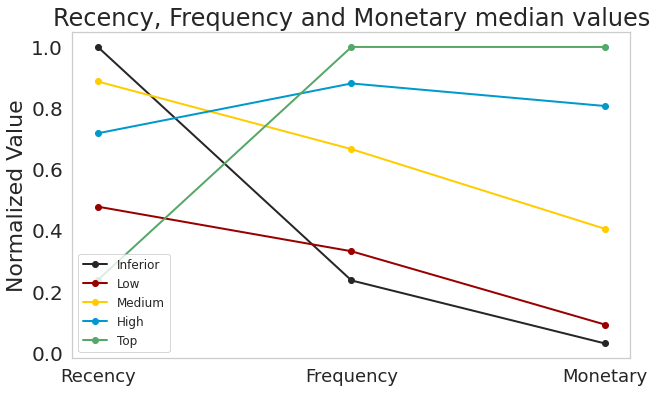

In [111]:
#Plot the normalized values (divided by the highest value) to compare the median value for each group
aux = median_rfm.values
aux

plt.figure(figsize = [10,6])
for i in range(aux.shape[1]+1):
    plt.plot(median_rfm.columns[1:],aux[i,1:]/aux[:,1:].max(0),linewidth = 2,marker='o',color=my_colors[i])

plt.legend(aux[:,0],fontsize = 12)
plt.grid(zorder=0)

plt.ylabel("Normalized Value",fontsize=22)
plt.title("Recency, Frequency and Monetary median values",fontsize=24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)

In [112]:
#Merge the score with Campaign acceptance and responde
Merge=(pd.merge(data_rfm,data[['ID','Response','Total Campaigns']],how='left',left_on="ID",right_on='ID'))
Merge.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group,Response,Total Campaigns
0,5524,58,22,1529,2,4,4,10,High,1,0
1,2174,38,4,21,3,1,1,5,Inferior,0,0
2,4141,26,20,734,3,4,3,10,High,0,0
3,6182,26,6,48,3,1,1,5,Inferior,0,0
4,5324,94,14,407,1,3,3,7,Low,0,0


In [113]:
#Clients who accepted at least one offer
#Accepted at least 1 offer
camp = Merge[Merge[['Total Campaigns']]>0]
#Respondants of the 6th Campaing
resp = Merge[Merge.Response>0]

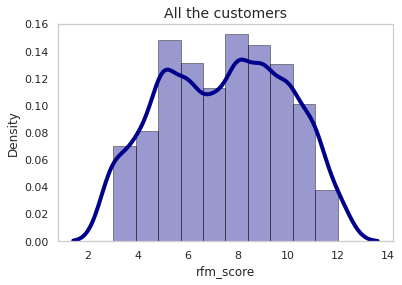

In [114]:
#rfm_score distribution with all the customers 
plt.figure(figsize = [6,4])
sns.distplot(data_rfm['rfm_score'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             
             kde_kws={'linewidth': 4})
plt.title("All the customers",fontsize=14)
plt.grid(b=None)

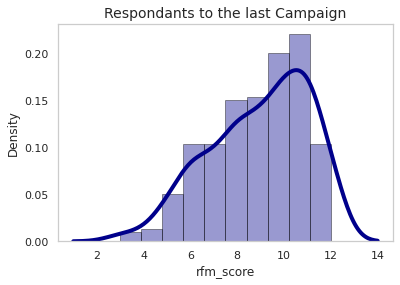

In [115]:
#rfm_score distribution with the customers who accepted the 6th Campaign
plt.figure(figsize = [6,4])
sns.distplot(resp['rfm_score'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             
             kde_kws={'linewidth': 4})
plt.title("Respondants to the last Campaign",fontsize=14)
plt.grid(b=None)

Comparing the 3 distributions, we can see that the customers who participate on the campaings have higher scores than the entire customer's base. So, with that simple segmentation we could increase the ROI of the campaing by selecting only our best customers, let's say, the Medium, High and Top group:

In [116]:
#Only the best clients (Top, High and Medium)
best=Merge[Merge.rfm_score >=8]

In [117]:
#Comparing the contacted customers considering the entire base and only the best customers
Comparing = pd.DataFrame()

Comparing['Unique_Customers'] = [Merge.ID.nunique(), best.ID.nunique(),100*(Merge.ID.nunique()-best.ID.nunique())/Merge.ID.nunique()]
Comparing['Gadgets_sold'] = [Merge['Total Campaigns'].sum(),best['Total Campaigns'].sum(),100*(Merge['Total Campaigns'].sum()-best['Total Campaigns'].sum())/Merge['Total Campaigns'].sum()]
Comparing.index = ['All_Customers','Best_Customers', 'Difference(%)']

In [118]:
Comparing.head()

,Unique_Customers,Gadgets_sold
All_Customers,2236.0000,665.000000
Best_Customers,1140.0000,556.000000
Difference(%),49.0161,16.390977


Using this simple customer's segmentation, if from the Campaign 1 we considered contacting only the Top, High and Medium group that represent our most active and loyal customers, we would reduce the contact costs in 48.7% and the revenue would decrease in only 16.4%.By focusing only on the more engaged customer, we would increase the **ROI** of the Campaign from **-45%** to **-11%**. Still not the ideal situation, but already much better. 

# 3. Análise Preditiva <a class="anchor" id="#model_pred"></a>

As we have a two-class classification problem, we will use Logistic Regression to predict the probability of the customer to accept or not the offer on the next campaign.


In [119]:
#I will use the data we prepared on the 1st part of this notebook and the rfm_score calculated on the 2nd part
data=pd.merge(df_silver,Merge[['ID','rfm_score']], how= 'left', on = "ID")
data.head()

,ID,Age,Age Group,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,...,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Campaigns Category,Response,rfm_score
0,5524,65,60-69,Single,Graduation,58138.0,0,0,0,112,...,0,0,0,0,0,0,0,None,1,10
1,2174,68,60-69,Single,Graduation,46344.0,1,1,2,94,...,0,0,0,0,0,0,0,None,0,5
2,4141,57,50-59,Married,Graduation,71613.0,0,0,0,101,...,0,0,0,0,0,0,0,None,0,10
3,6182,38,30-39,Married,Graduation,26646.0,1,0,1,95,...,0,0,0,0,0,0,0,None,0,5
4,5324,41,40-49,Married,PhD,58293.0,1,0,1,96,...,0,0,0,0,0,0,0,None,0,7


In [120]:
data.columns

Index(['ID', 'Age', 'Age Group', 'Marital', 'Education', 'Income', 'Num Kid',
       'Num Teen', 'Num Children', 'Months_Customer', 'Recency',
       'Recency Category', 'Wines', 'Wines %', 'Fruits', 'Fruits %',
       'Meat Prods', 'Meat %', 'Fish Prods', 'Fish %', 'Sweet Prods',
       'Sweet %', 'Gold Prods', 'Gold Prods Category', 'Total Spent',
       'Spend Category', 'Deals Purchases', 'Web Purchases', 'Web %',
       'Catalog Purchases', 'Catalog %', 'Store Purchases', 'Store %',
       'Total Purchases', 'Purchases Category', 'Spend per Purchase',
       'Spend/Purchase Category', 'Web Visits', 'Complain', 'Campaign 1',
       'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5',
       'Total Campaigns', 'Campaigns Category', 'Response', 'rfm_score'],
      dtype='object')

In [121]:
#Drop some columns
data=data.drop(['Age Group', 'Recency Category','Purchases Category', 'Campaigns Category','Spend Category','Gold Prods Category','Spend/Purchase Category'], axis = 1)
data.head()

,ID,Age,Marital,Education,Income,Num Kid,Num Teen,Num Children,Months_Customer,Recency,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Response,rfm_score
0,5524,65,Single,Graduation,58138.0,0,0,0,112,58,...,7,0,0,0,0,0,0,0,1,10
1,2174,68,Single,Graduation,46344.0,1,1,2,94,38,...,5,0,0,0,0,0,0,0,0,5
2,4141,57,Married,Graduation,71613.0,0,0,0,101,26,...,4,0,0,0,0,0,0,0,0,10
3,6182,38,Married,Graduation,26646.0,1,0,1,95,26,...,6,0,0,0,0,0,0,0,0,5
4,5324,41,Married,PhD,58293.0,1,0,1,96,94,...,5,0,0,0,0,0,0,0,0,7


In [122]:
#Transform 'object' type column into numerical column (Education and Marital)

new_marital = data['Marital'].replace(['Single','Married', 'Divorced','Widow'],[0,1,2,3])
data.insert(2,'Marital Status',value=new_marital)

new_education = data['Education'].replace(['Basic','2n Cycle','Graduation', 'Master','PhD'],[0,1,2,3,4])
data.insert(3,'Education Level',value=new_education)

In [123]:
#Check if the columns were transformed properly

#Education
data_ed = data.groupby('Education Level')['Education'].unique()
pd.DataFrame({'Education Level':data_ed.index, 'Education':data_ed.values})

,Education Level,Education
0,0,[Basic]
1,1,[2n Cycle]
2,2,[Graduation]
3,3,[Master]
4,4,[PhD]


In [124]:
#Marital
data_ms=data.groupby('Marital Status')['Marital'].unique()
pd.DataFrame({'Marital Status':data_ms.index, 'Marital':data_ms.values})

,Marital Status,Marital
0,0,[Single]
1,1,[Married]
2,2,[Divorced]
3,3,[Widow]


In [125]:
#Drop 'original' Education and Marital columns and leave the transformed ones 
data=data.drop(['Marital','Education'], axis = 1)
data.head()

,ID,Age,Marital Status,Education Level,Income,Num Kid,Num Teen,Num Children,Months_Customer,Recency,...,Web Visits,Complain,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total Campaigns,Response,rfm_score
0,5524,65,0,2,58138.0,0,0,0,112,58,...,7,0,0,0,0,0,0,0,1,10
1,2174,68,0,2,46344.0,1,1,2,94,38,...,5,0,0,0,0,0,0,0,0,5
2,4141,57,1,2,71613.0,0,0,0,101,26,...,4,0,0,0,0,0,0,0,0,10
3,6182,38,1,2,26646.0,1,0,1,95,26,...,6,0,0,0,0,0,0,0,0,5
4,5324,41,1,4,58293.0,1,0,1,96,94,...,5,0,0,0,0,0,0,0,0,7


In [126]:
PT = data.drop(['ID','Response'],axis=1)

In [127]:
def plot_power_transformed_feature(df, var, PT):
    plt.figure(figsize=[15,5])
    plt.subplot(121)
    plt.hist(df[var])
    plt.title(var + ' before P. Trans.')
    
    plt.subplot(122)
    pt = PT.fit_transform(df[[var]]).flatten()
    plt.hist(pt)
    plt.title(var + ' after P. Trans.')

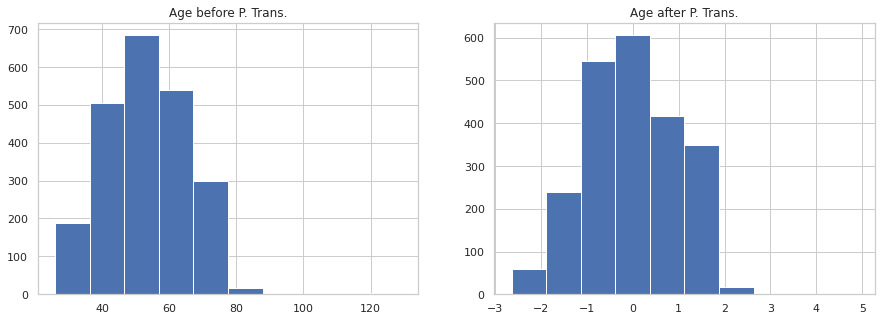

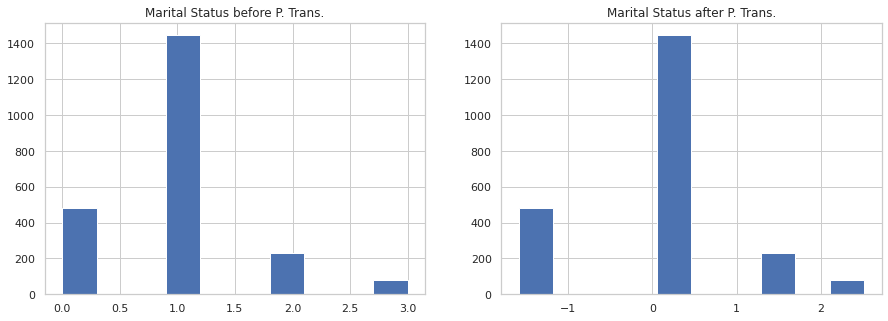

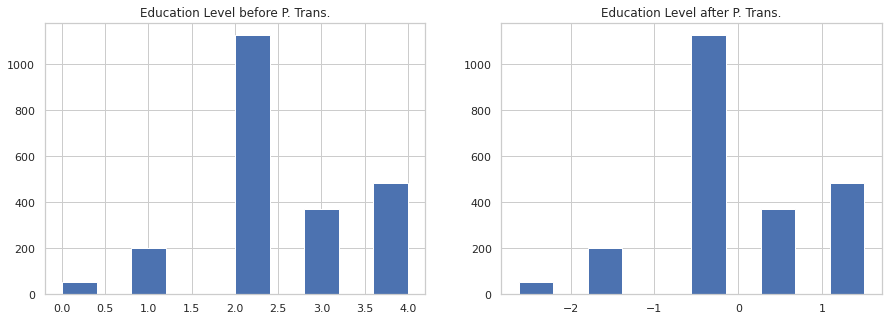

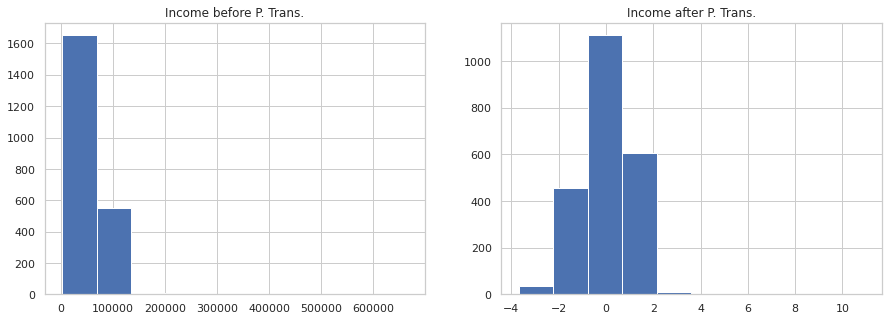

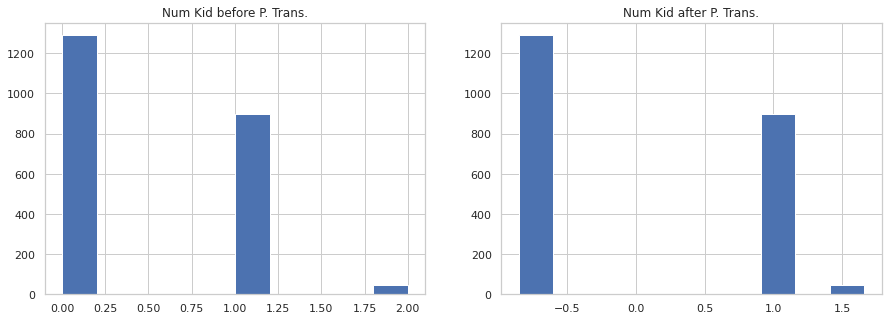

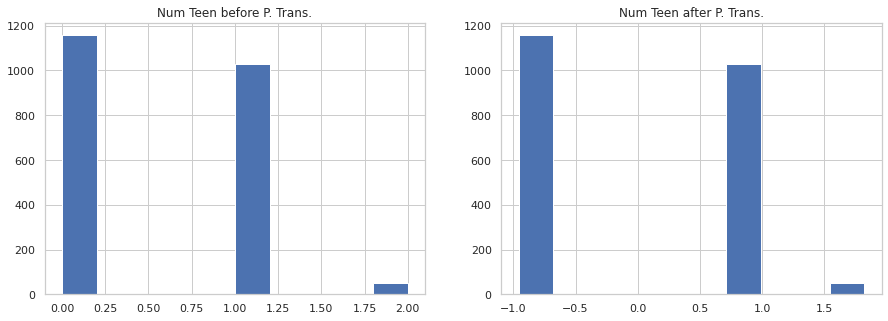

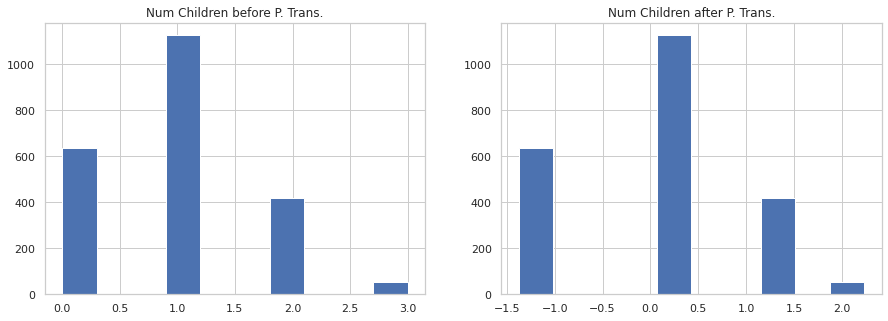

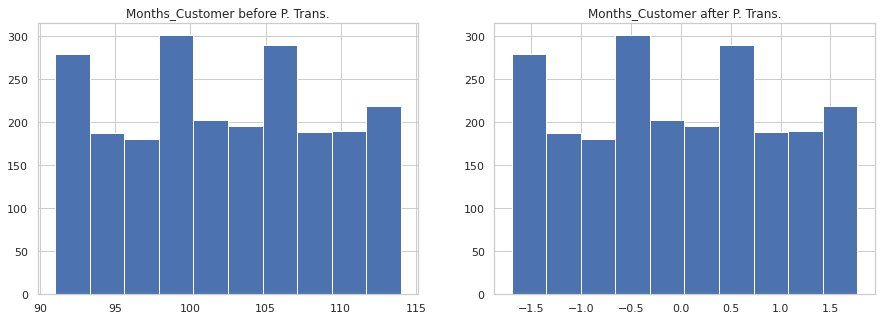

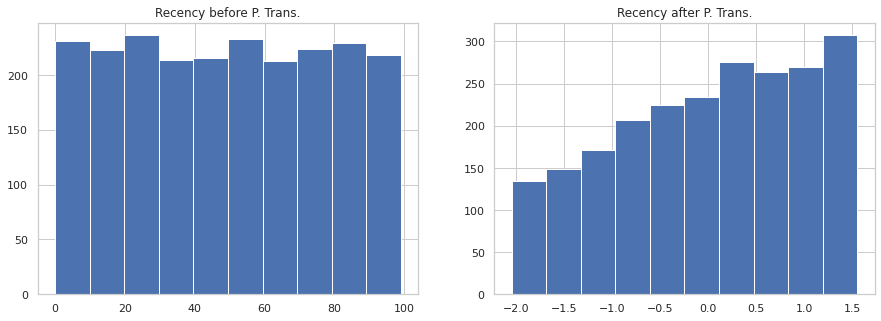

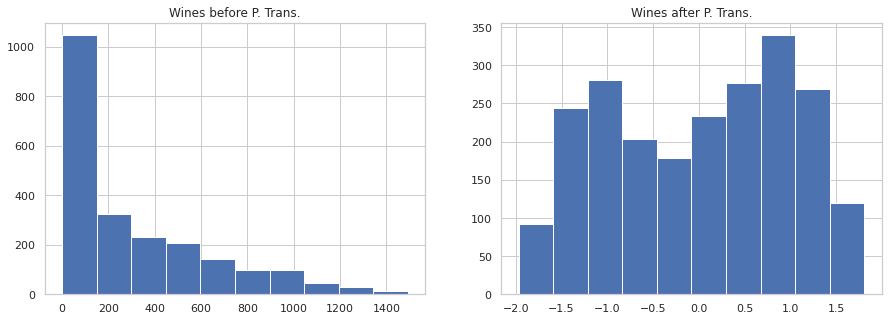

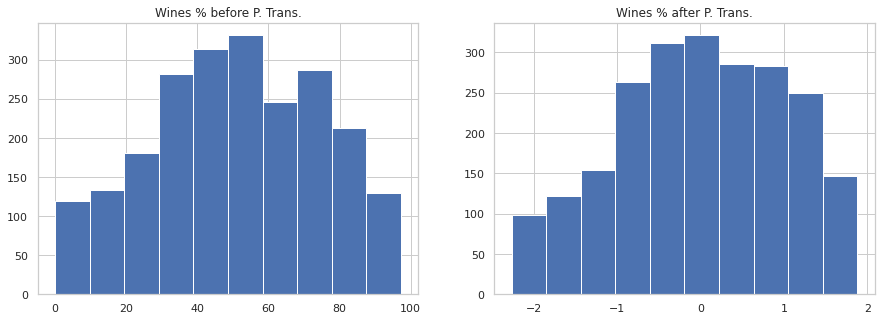

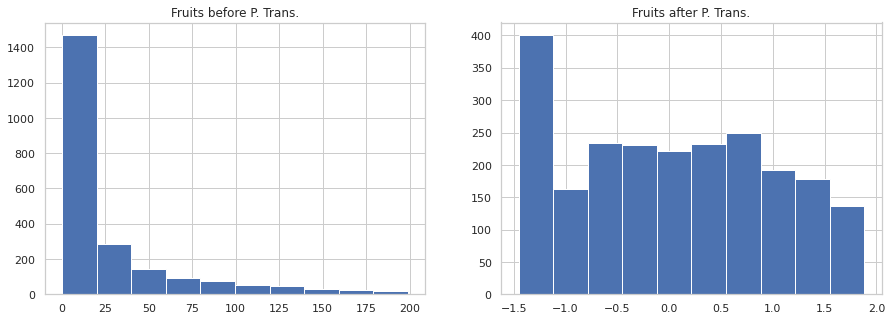

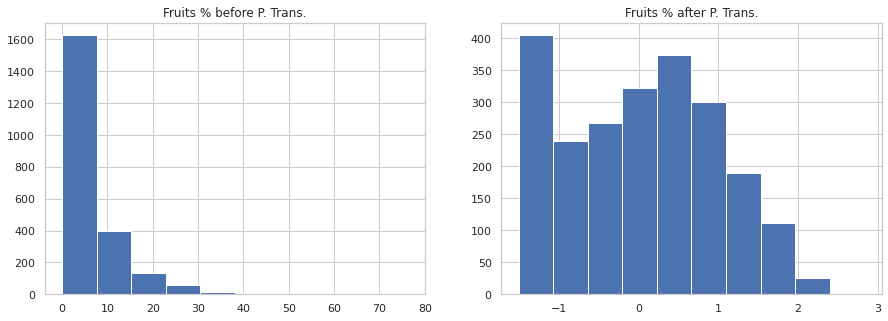

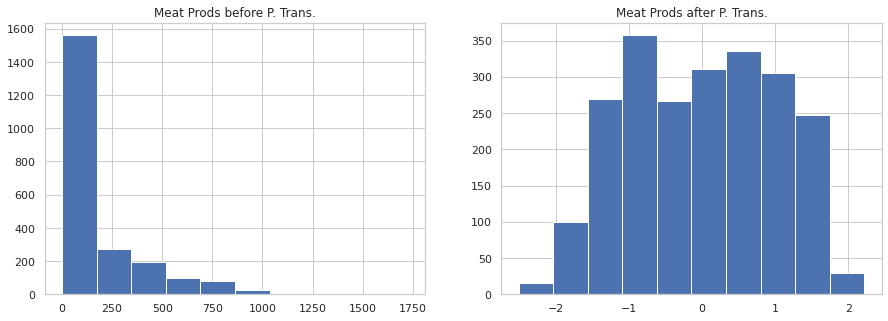

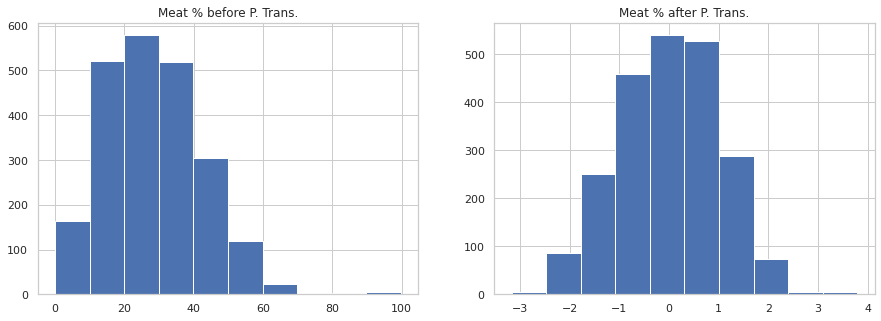

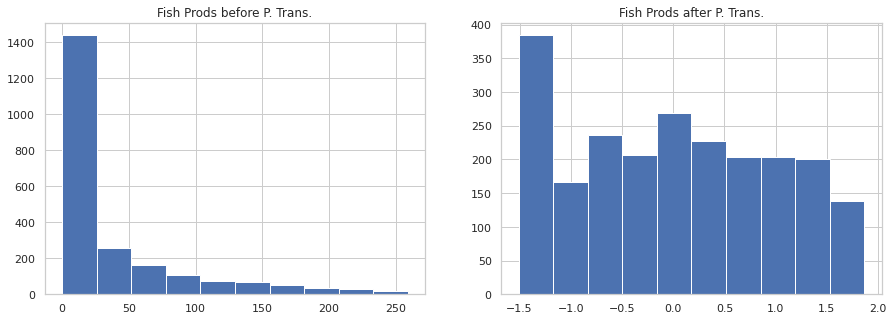

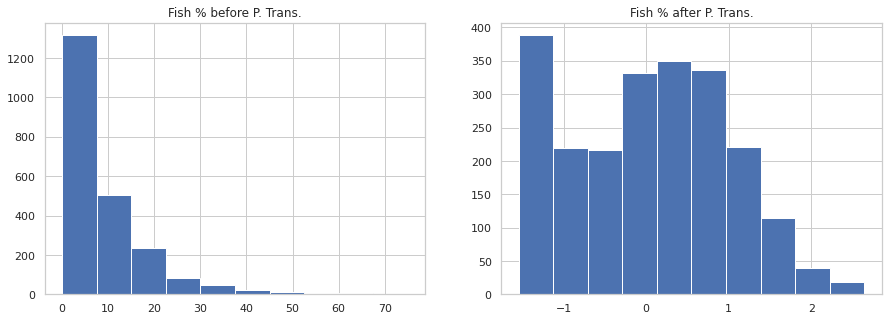

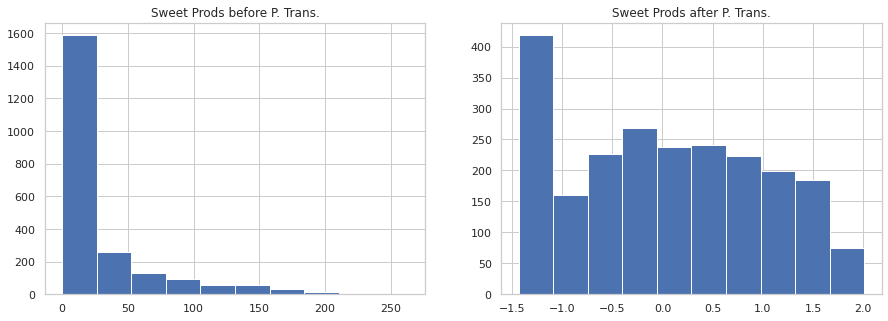

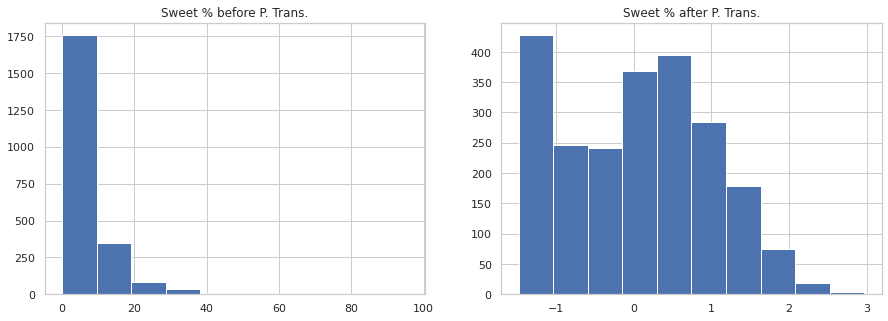

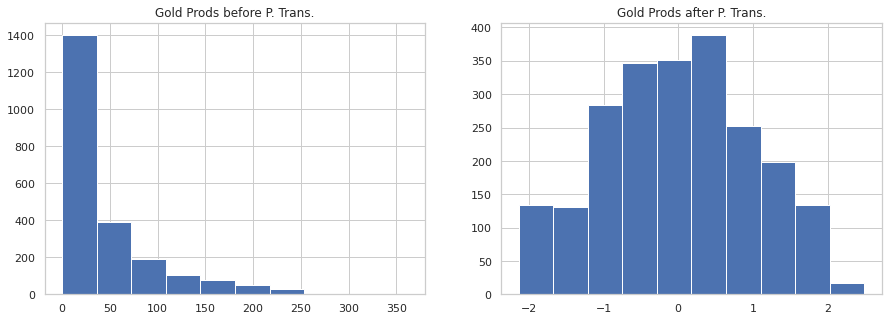

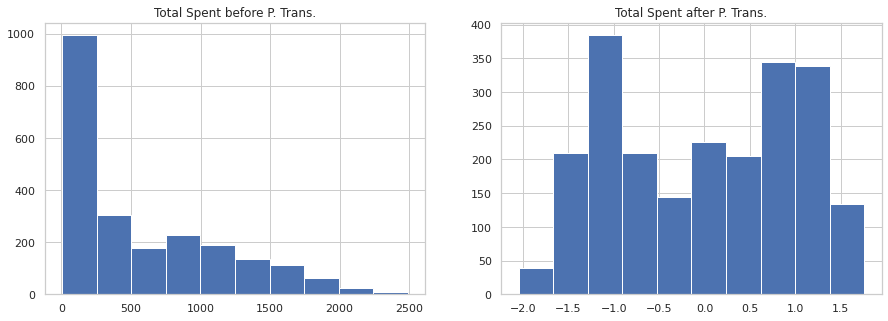

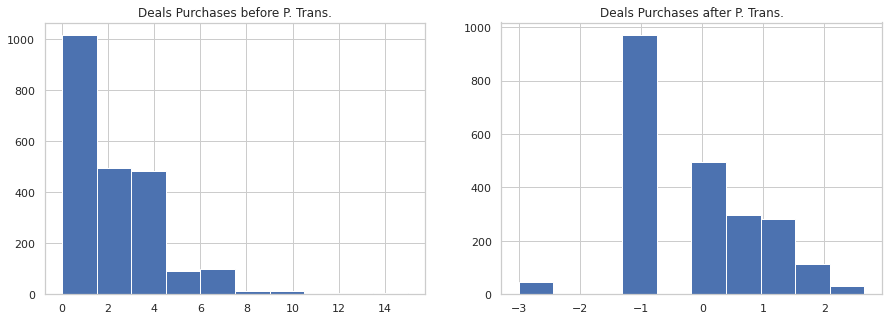

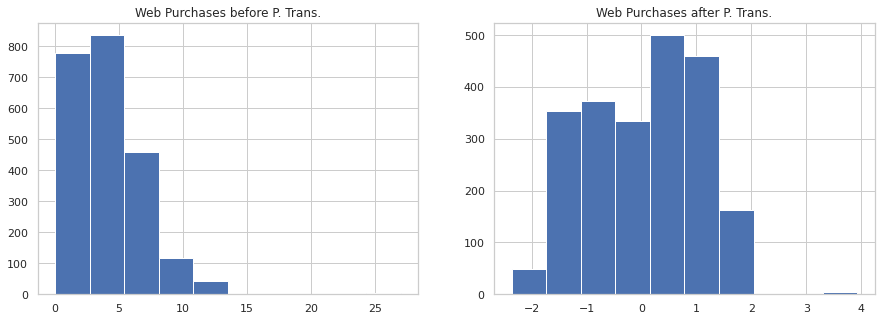

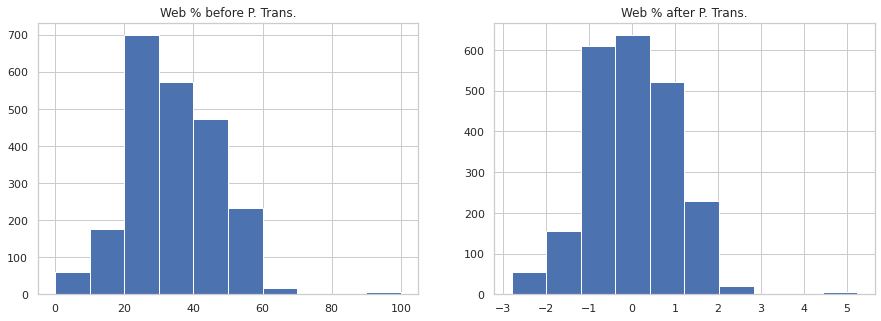

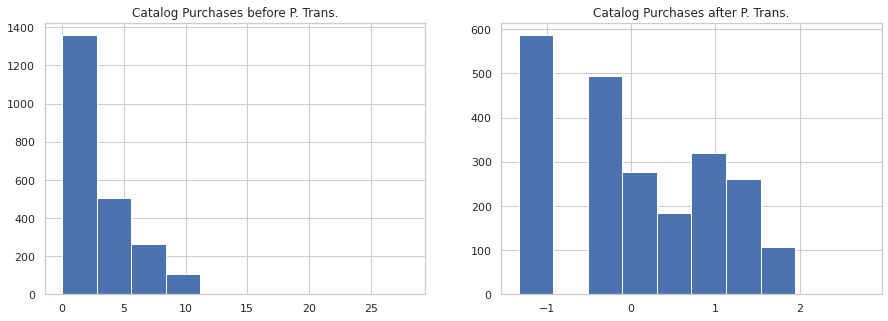

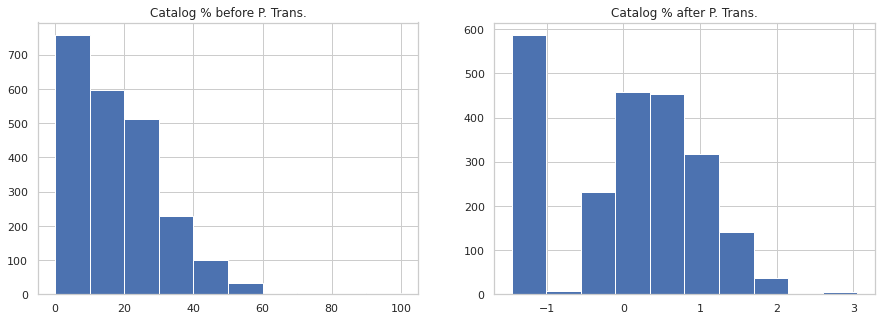

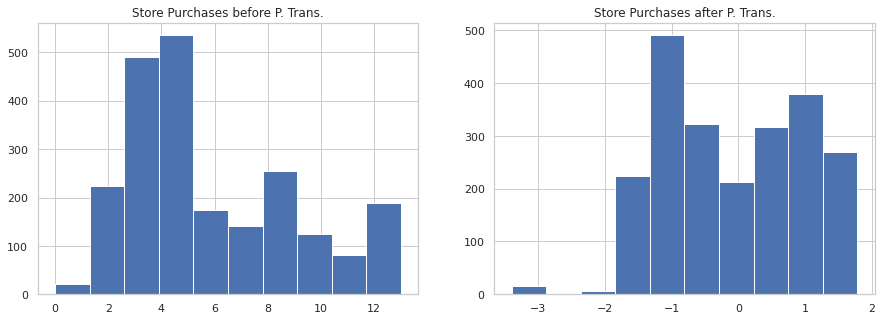

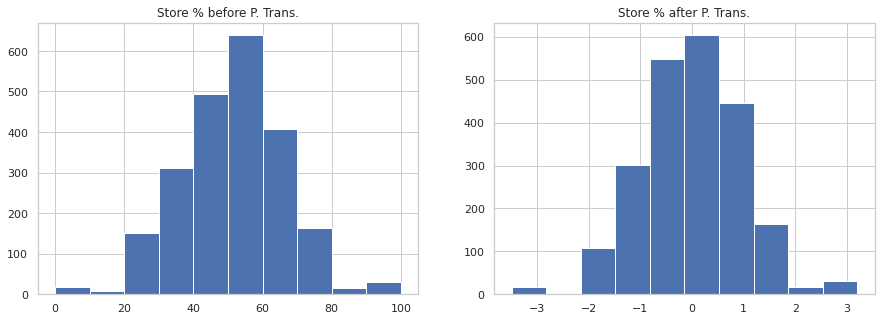

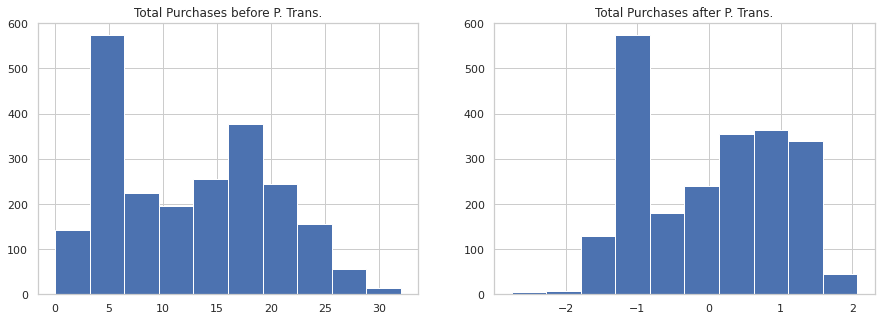

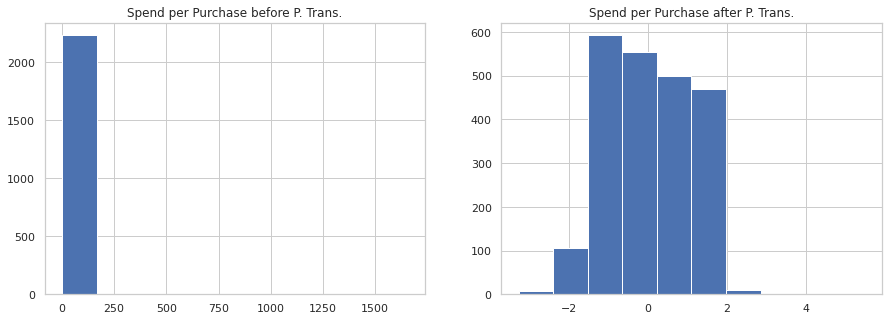

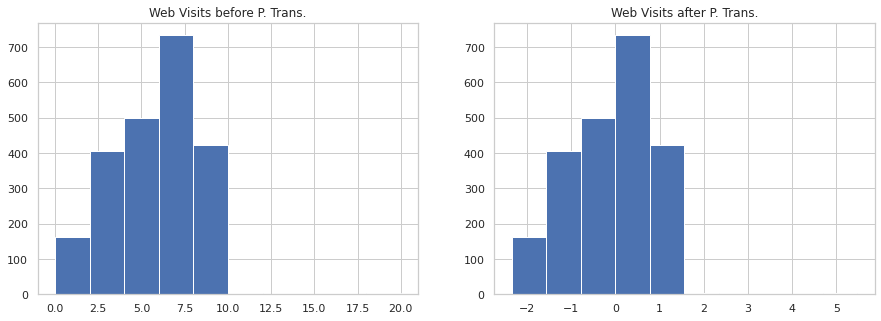

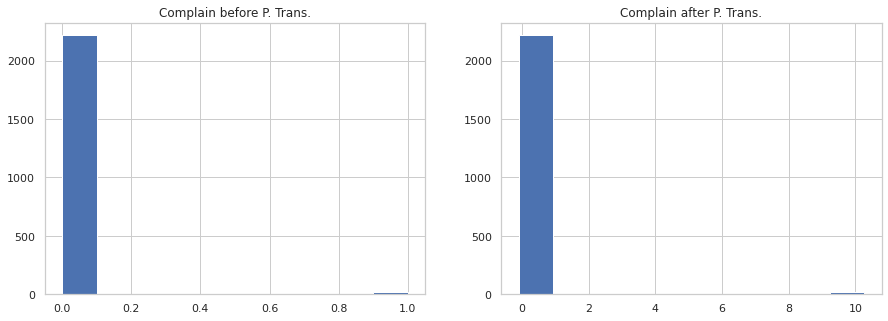

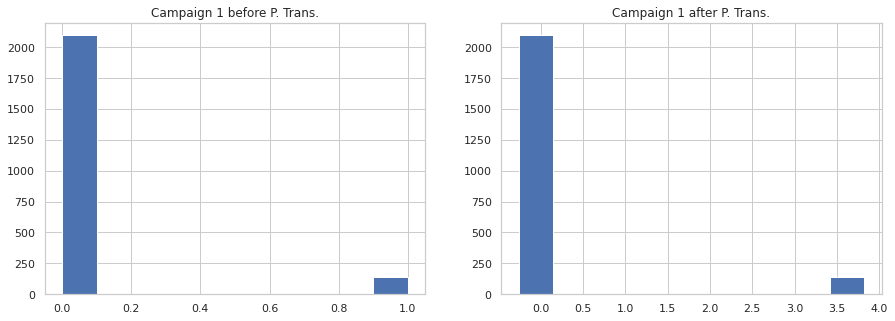

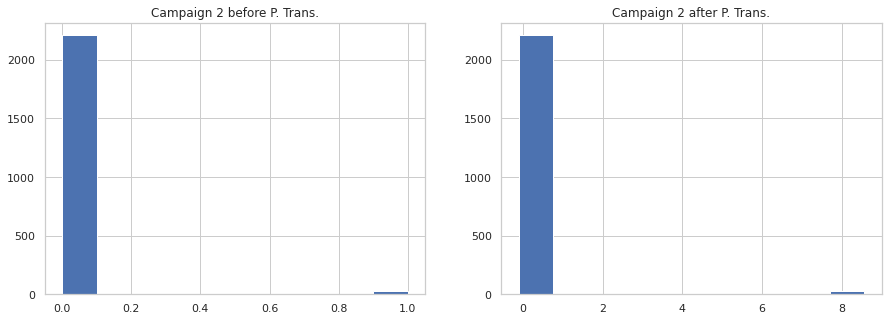

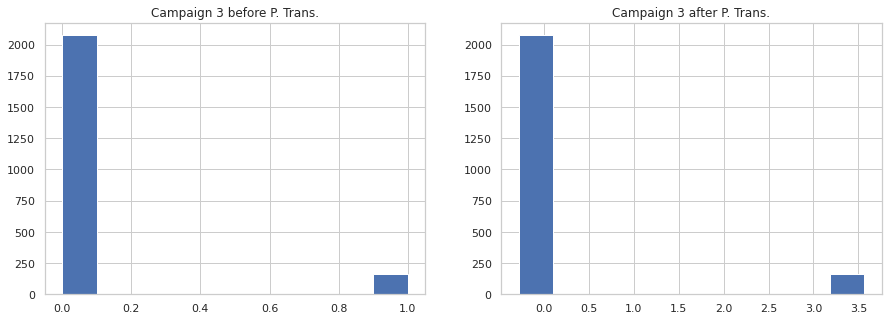

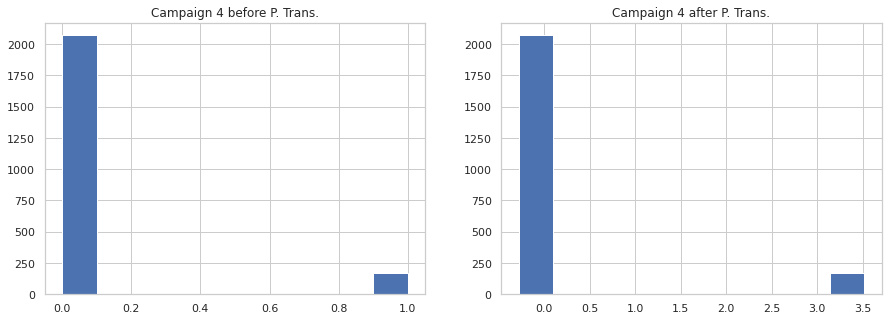

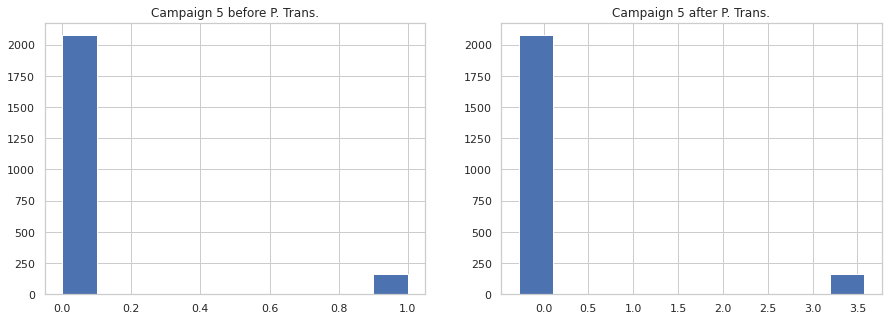

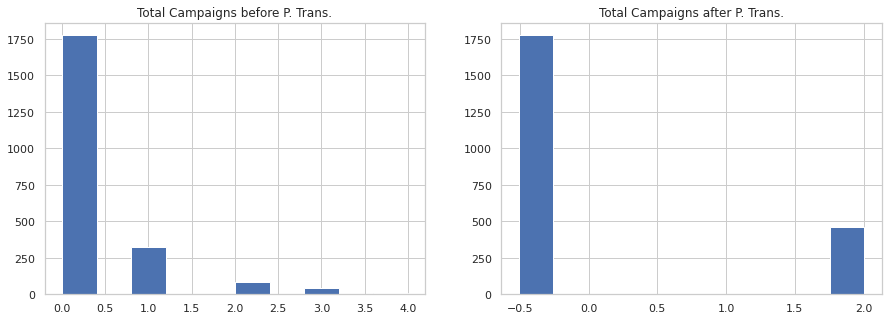

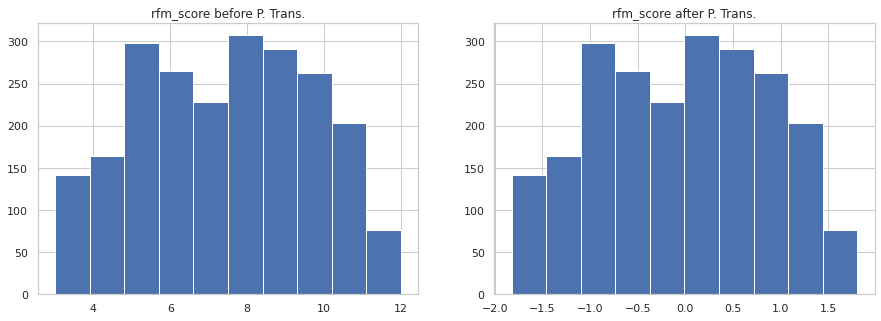

In [128]:
for col in PT.columns:
    plot_power_transformed_feature(PT,col,PowerTransformer())

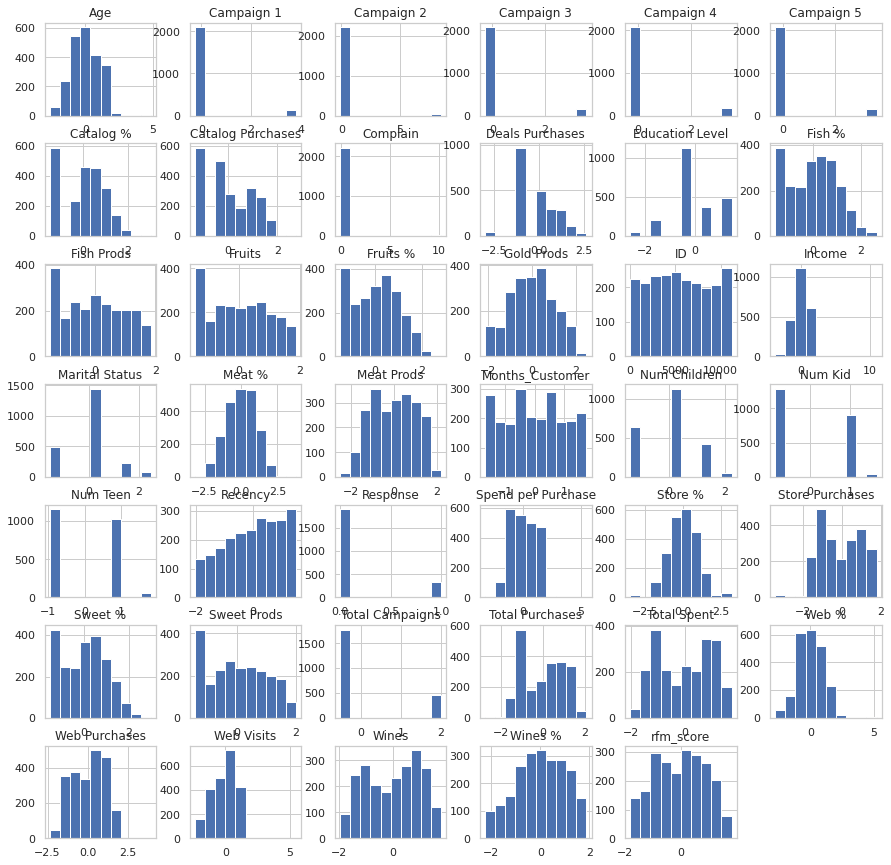

In [129]:
data_PT = data
for col in PT.columns:
    data_PT[col] = PowerTransformer().fit_transform(data[[col]]).flatten()
data_PT.hist(figsize=[15,15]);

data = data_PT

In [130]:
#Let's rank the correlation of the variables with our target
data_cor=abs(data.corr()['Response']).sort_values(ascending=False)
data_cor=data_cor.to_frame()
data_cor

,Response
Response,1.000000
Total Campaigns,0.370177
Campaign 5,0.324814
Campaign 1,0.291821
Store %,0.258712
rfm_score,0.257238
Campaign 3,0.255442
Catalog %,0.243164
Catalog Purchases,0.233168
Meat Prods,0.224297


In [131]:
#For the model I will select the features with higher correlation with the target.
#Excluded Features: Complain, NumWebVisitMonth, ID, Approx_age, Marital_ID,NumDealsPurchases and NumStorePurchases
Features_to_use = data_cor.index[1:22].values
Features_to_use

array(['Total Campaigns', 'Campaign 5', 'Campaign 1', 'Store %',
       'rfm_score', 'Campaign 3', 'Catalog %', 'Catalog Purchases',
       'Meat Prods', 'Spend per Purchase', 'Total Spent', 'Recency',
       'Wines', 'Months_Customer', 'Num Children', 'Campaign 4',
       'Gold Prods', 'Campaign 2', 'Web Purchases', 'Total Purchases',
       'Num Teen'], dtype=object)

In [132]:
#Setting the independents and dependent variables
X = data[Features_to_use].values
Y = data['Response'].values

print(X.shape)
print(Y.shape)

(2236, 21)
(2236,)


In [133]:
#Separate the data to train and to test (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(1565, 21)
(1565,)
(671, 21)
(671,)


<AxesSubplot:ylabel='count'>

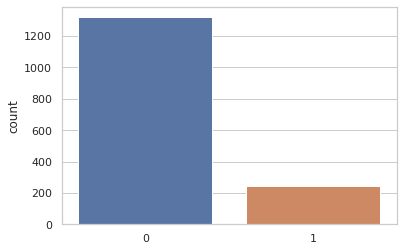

In [134]:
#On our train dataset, we have much more clients that didn't respond to the Campaign, so we will need to resample our data
#so both classes not represented equally.
plt.figure(figsize = [6,4])
sns.countplot(x = Y_train)

<AxesSubplot:ylabel='count'>

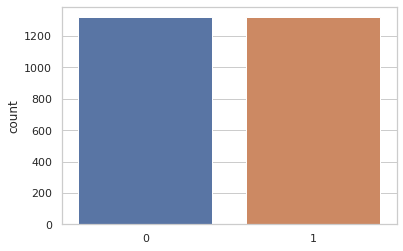

In [135]:
#Using the oversampling technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

plt.figure(figsize = [6,4])
sns.countplot(x = Y_train)

In [136]:
#Let's use de logical regression model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=10, solver='liblinear').fit(X_train,Y_train)

In [137]:
#Predict Values
model_LR.predict(X_train)

array([0, 0, 0, ..., 1, 1, 0])

In [138]:
#Probabilities to not accept and accept the offer
model_LR.predict_proba(X_train)

array([[0.68937728, 0.31062272],
       [0.70190091, 0.29809909],
       [0.97136448, 0.02863552],
       ...,
       [0.01335742, 0.98664258],
       [0.17325259, 0.82674741],
       [0.79697137, 0.20302863]])

In [139]:
#Accuracy of our model
model_LR.score(X_test,Y_test)


0.8301043219076006

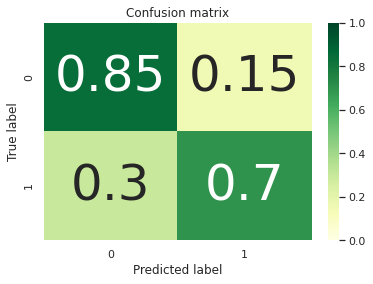

In [140]:
#Let's check the Confusion matrix

from sklearn.metrics import confusion_matrix
cm_model_LR = confusion_matrix(Y_test, model_LR.predict(X_test))

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGn", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#in percentage
cm_model_LR_fract = cm_model_LR / cm_model_LR.sum(axis=1).reshape(-1,1)
cm_model_LR_percent = 100*cm_model_LR_fract

#Visualizing the confusion matrix
plt.figure(figsize = [6,4])
plot_confusion_matrix(cm_model_LR_fract, classes = model_LR.classes_, title='Confusion matrix')

As we can see, our model correctly predicted 81% of the customers who didn't accept the offer and 70% of the customers who accepted the offer on the last campaign.